#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Level</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [1]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement 

## Nature des variables

In [2]:
path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Experience_Level,BMI,Workout_Frequency,Session_Duration,Water_Intake
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1313,Yoga,12.6,3,30.20,4,1.69,3.5
2,46,Female,74.9,1.53,179,151,66,883,HIIT,33.9,2,32.00,4,1.30,2.1
3,32,Female,68.1,1.66,167,122,54,677,Cardio,33.4,2,24.71,4,1.11,2.3
4,25,Male,53.2,1.70,190,164,56,532,Strength,28.8,1,18.41,3,0.59,2.1
5,38,Male,46.1,1.79,188,158,68,556,Strength,29.2,1,14.39,3,0.64,2.8
6,56,Female,58.0,1.68,168,156,74,1116,HIIT,15.5,3,20.55,5,1.59,2.7


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. pour traiter les données correctement nous avons transformés les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

## Analyse unidimensionnelle des variables

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


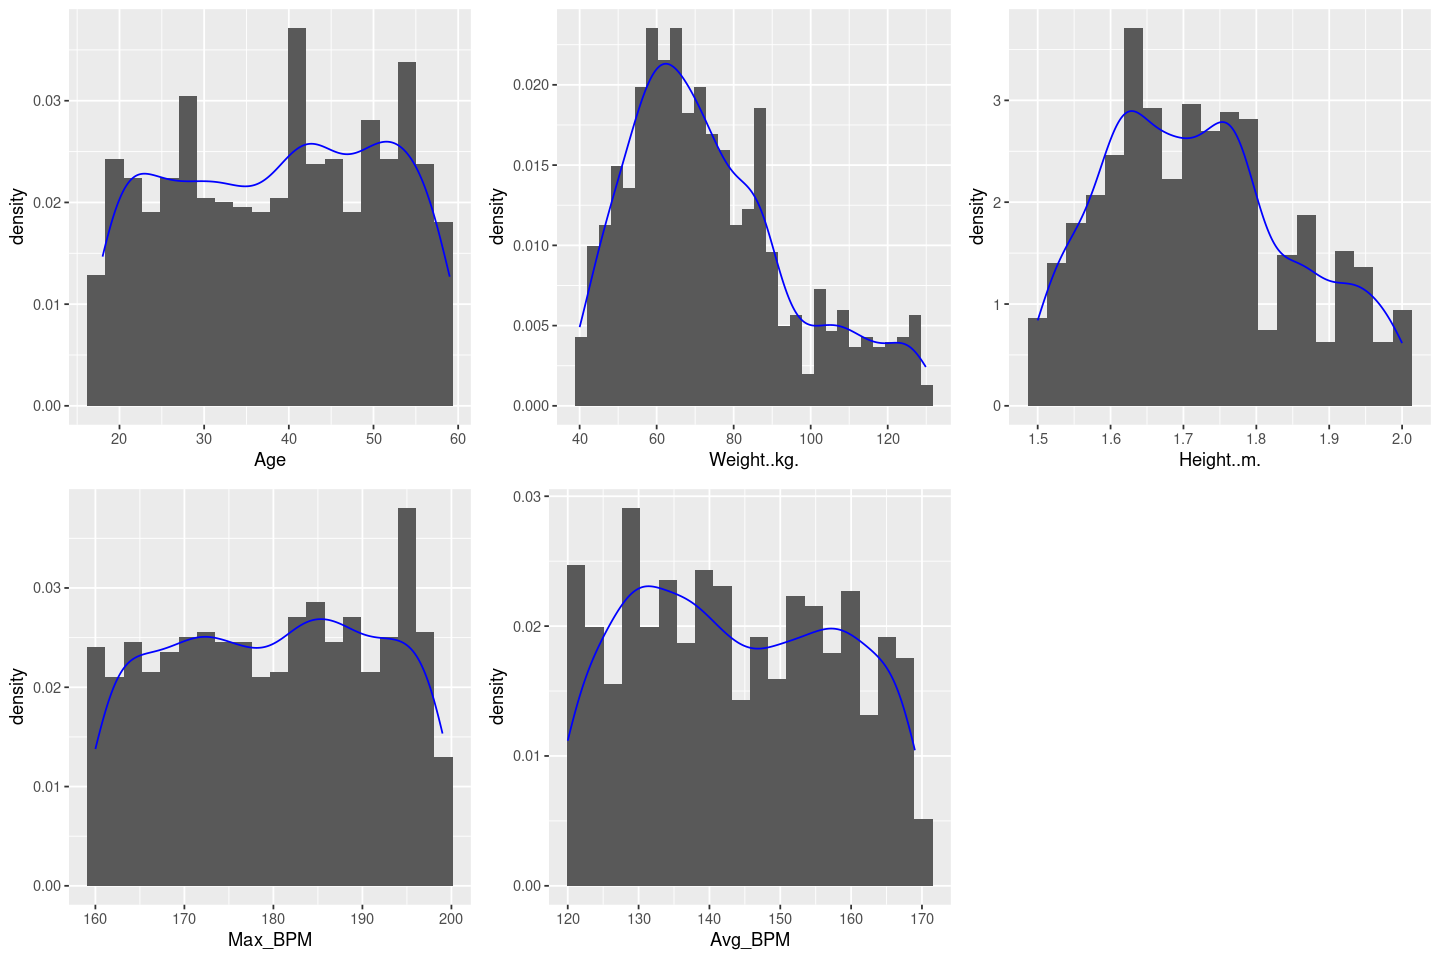

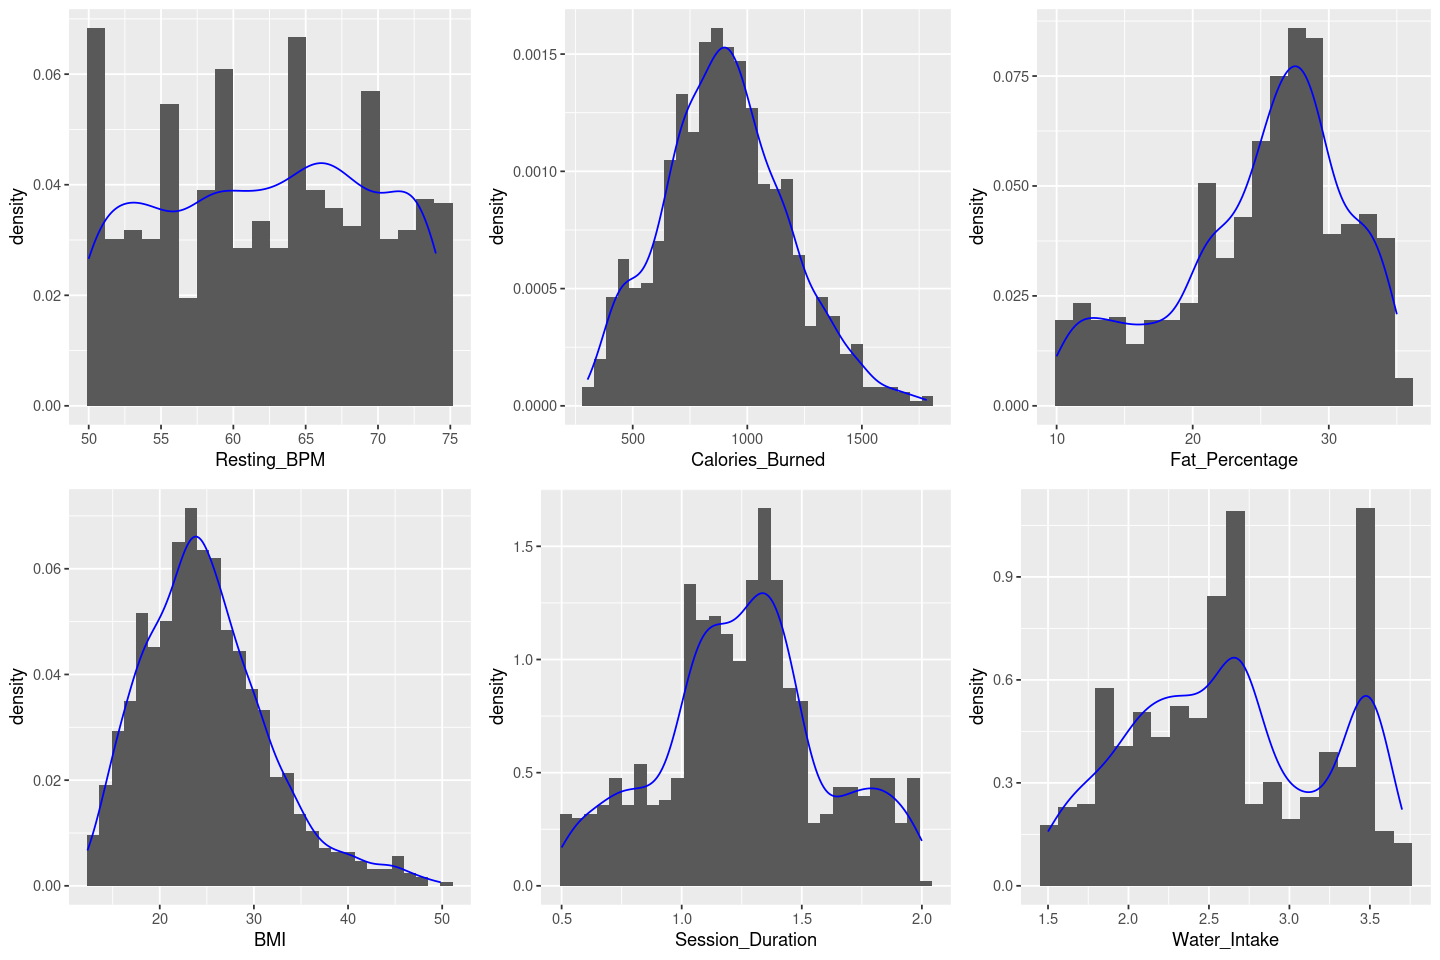

In [3]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

liste des transformations possibles pour le pré-processing des données: \
Transformation logarithmique (si les données sont fortement asymétriques).

Transformation racine carrée (si les données ne sont pas aussi étendues).

Transformation Box-Cox (pour rechercher automatiquement la meilleure transformation).

Transformation de puissance inverse (si tu veux réduire l'impact des grandes valeurs).

Transformation quantile

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


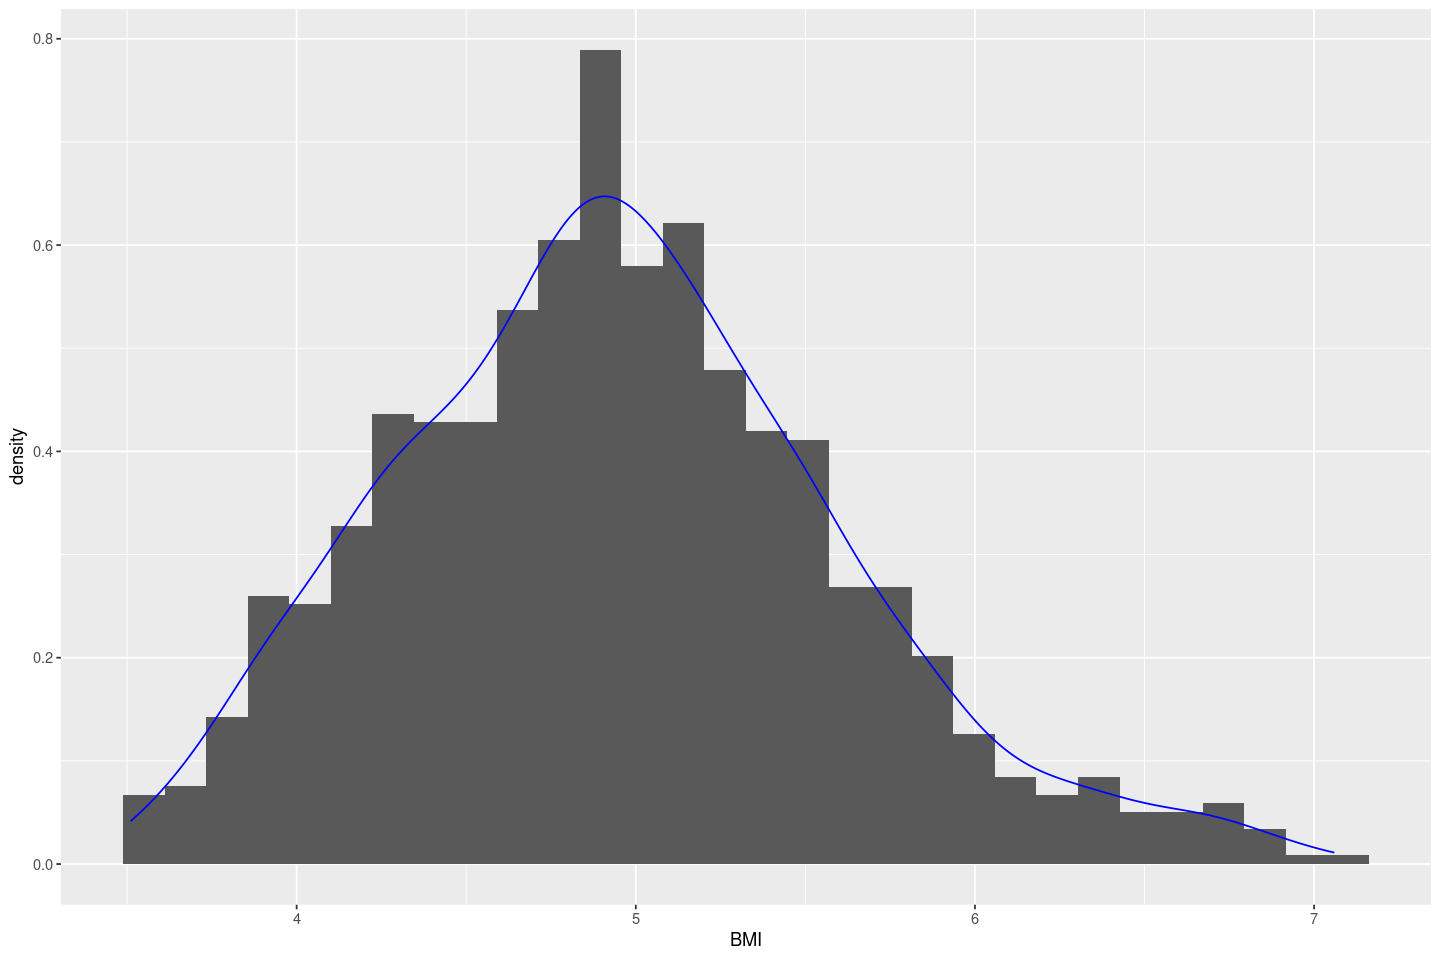

In [4]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément 

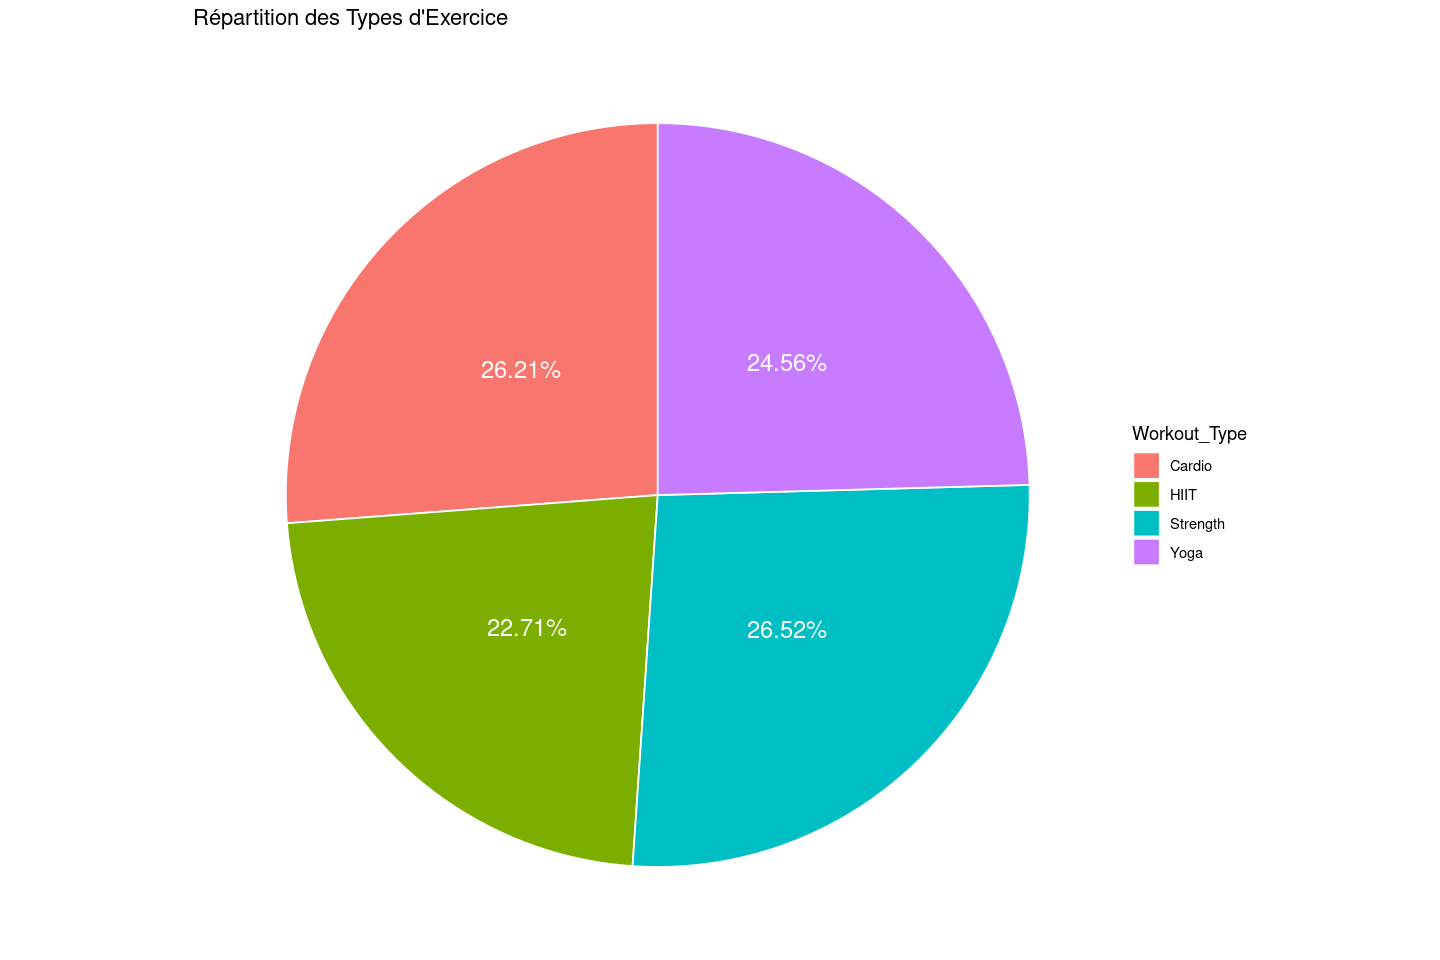

In [5]:
ggplot(Gym, aes(x = "", fill = Workout_Type)) +
  geom_bar( width = 1, color="white") +
  coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + 
    geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

## Analyse bidimensionnelle des variables
#### Corrélation

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

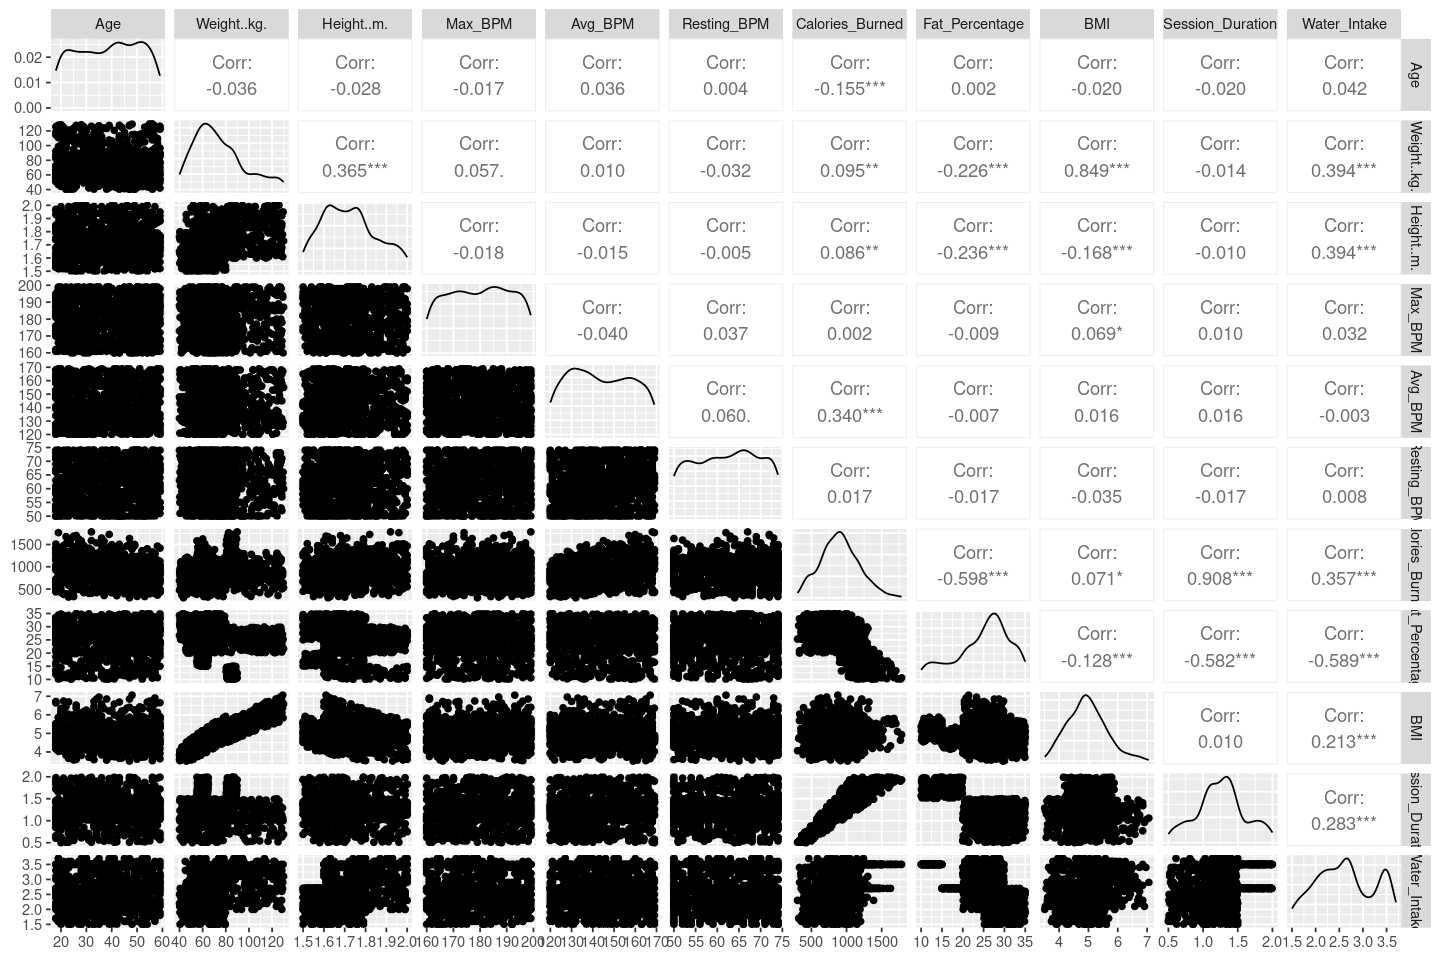

In [6]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 

A faire: Trouver la commande qui détermine l'indice des individus chelous dans fat percentage/ Water intake
Voir globalement si on peut analyser plus les pics de water intake?

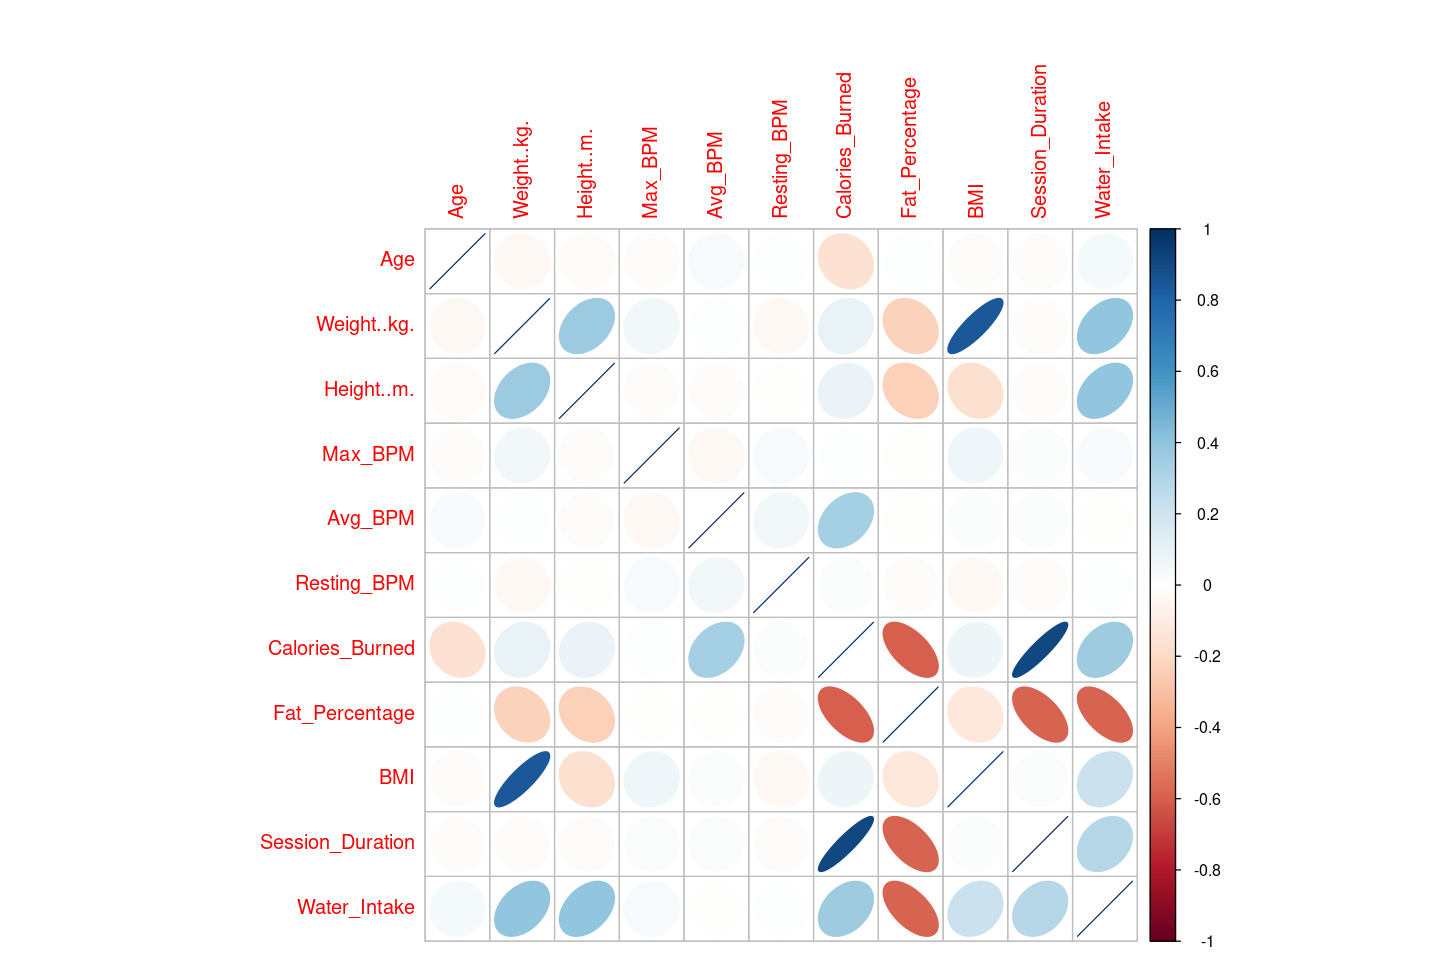

In [7]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

#### Quali/Quanti

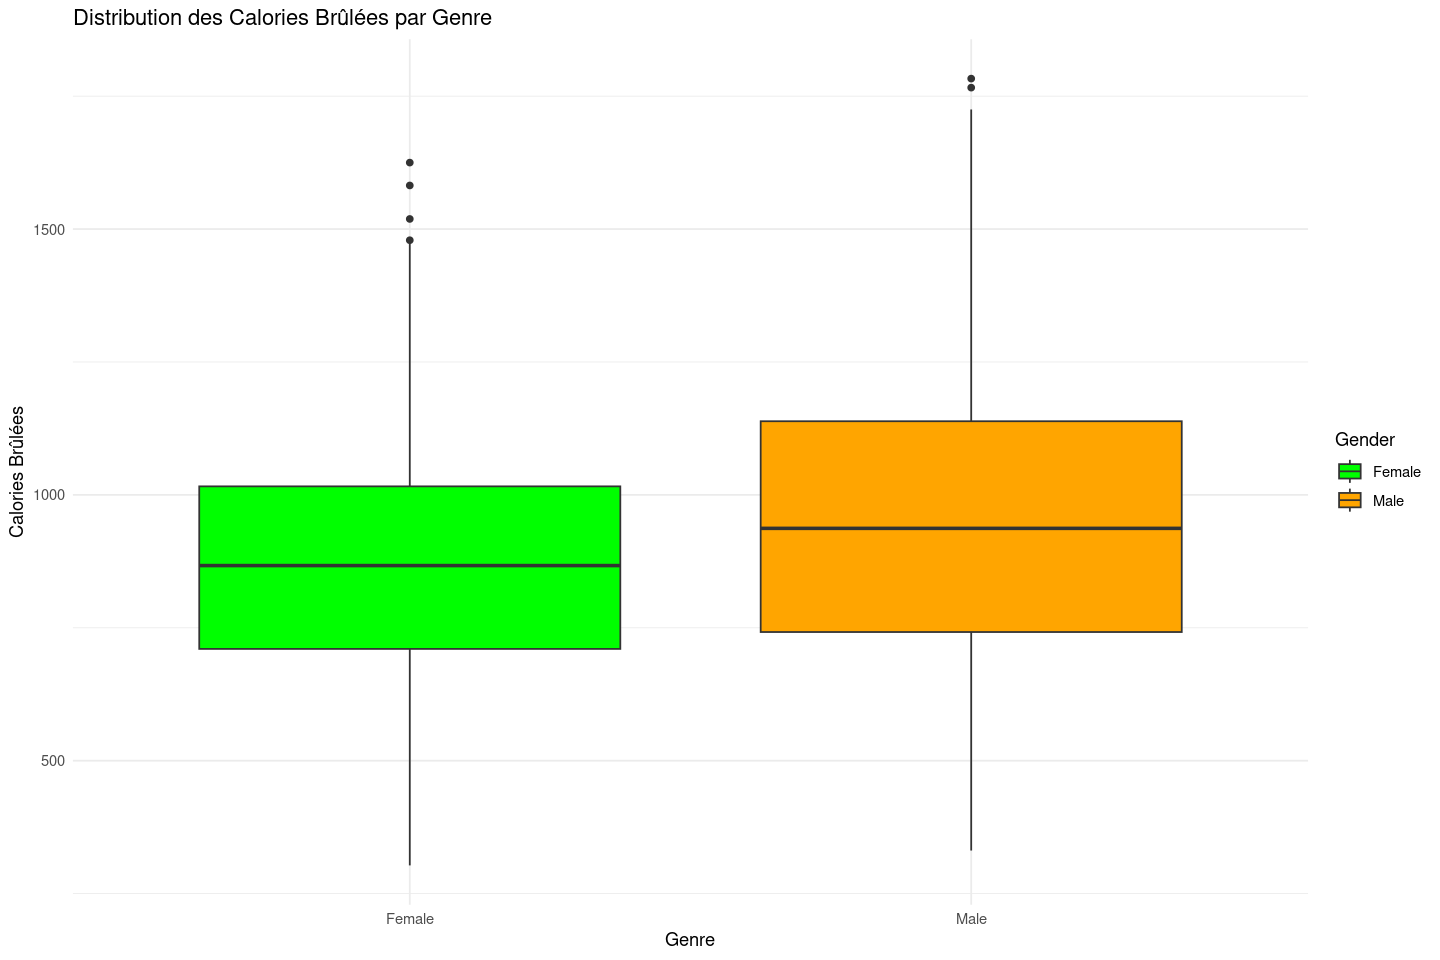

In [8]:
ggplot(Gym, aes(x = Gender, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Genre",
       x = "Genre",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "orange", "Female" = "green"))

On remarque assez facilement une légère différence entre les calories brulées chez les femmes et celles chez les hommes. 

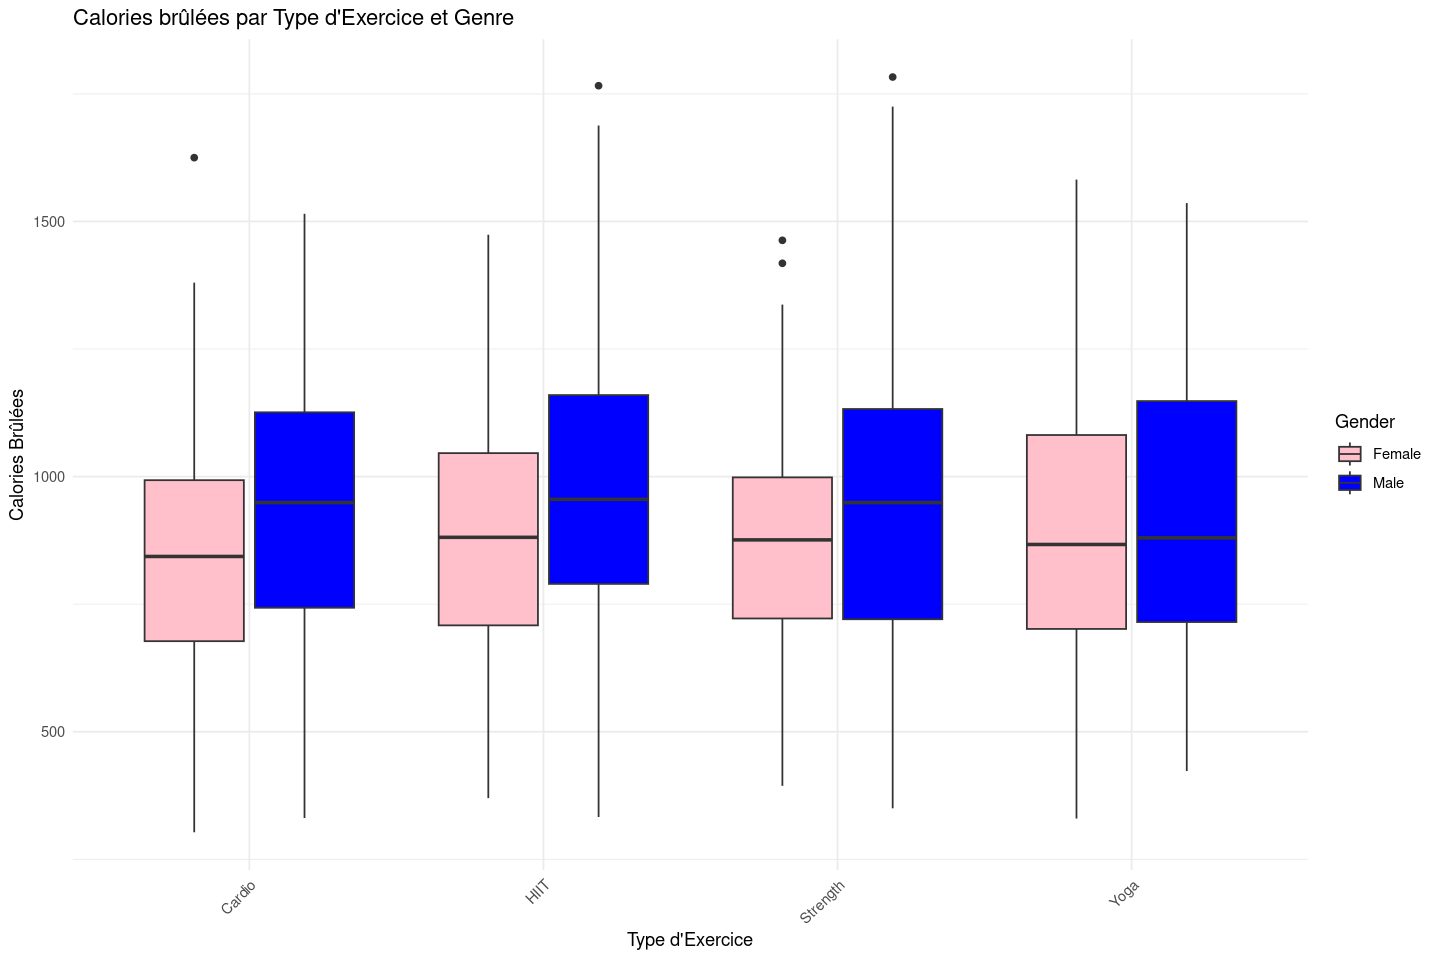

In [9]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

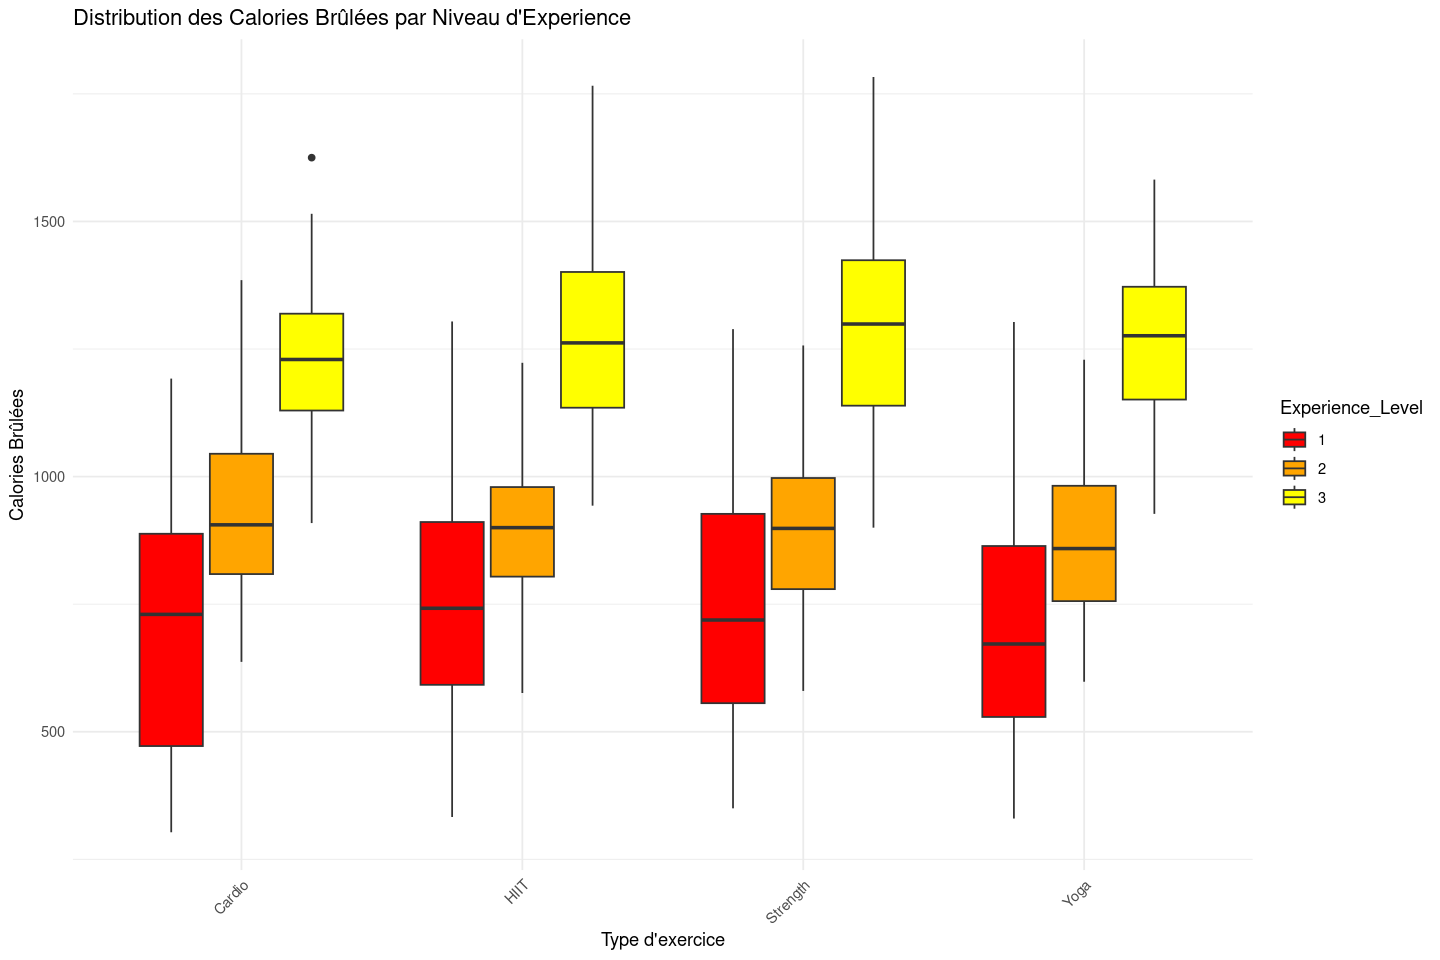

In [10]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Nous voyons de façon évidente qu'à un niveau d'experience plus élevée est souvent associées un plus grand nombre de calories brulées, cela est sûrement dû à l'intensité et à la durée d'exercice qui devrait augmenter avec l'expérience nous allons à présent le vérifier. 

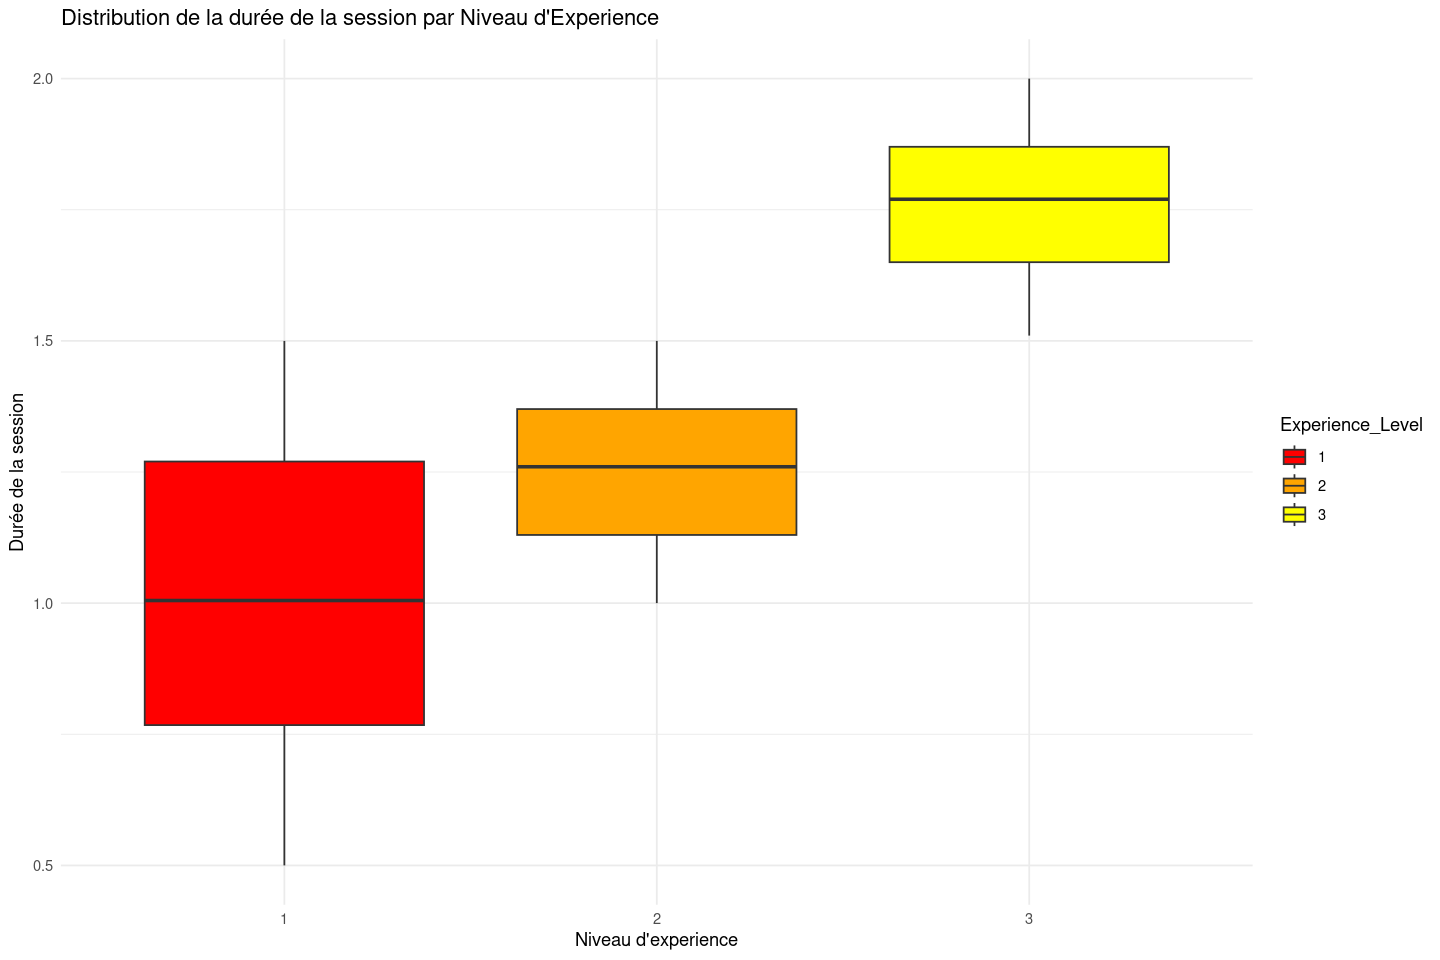

In [11]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

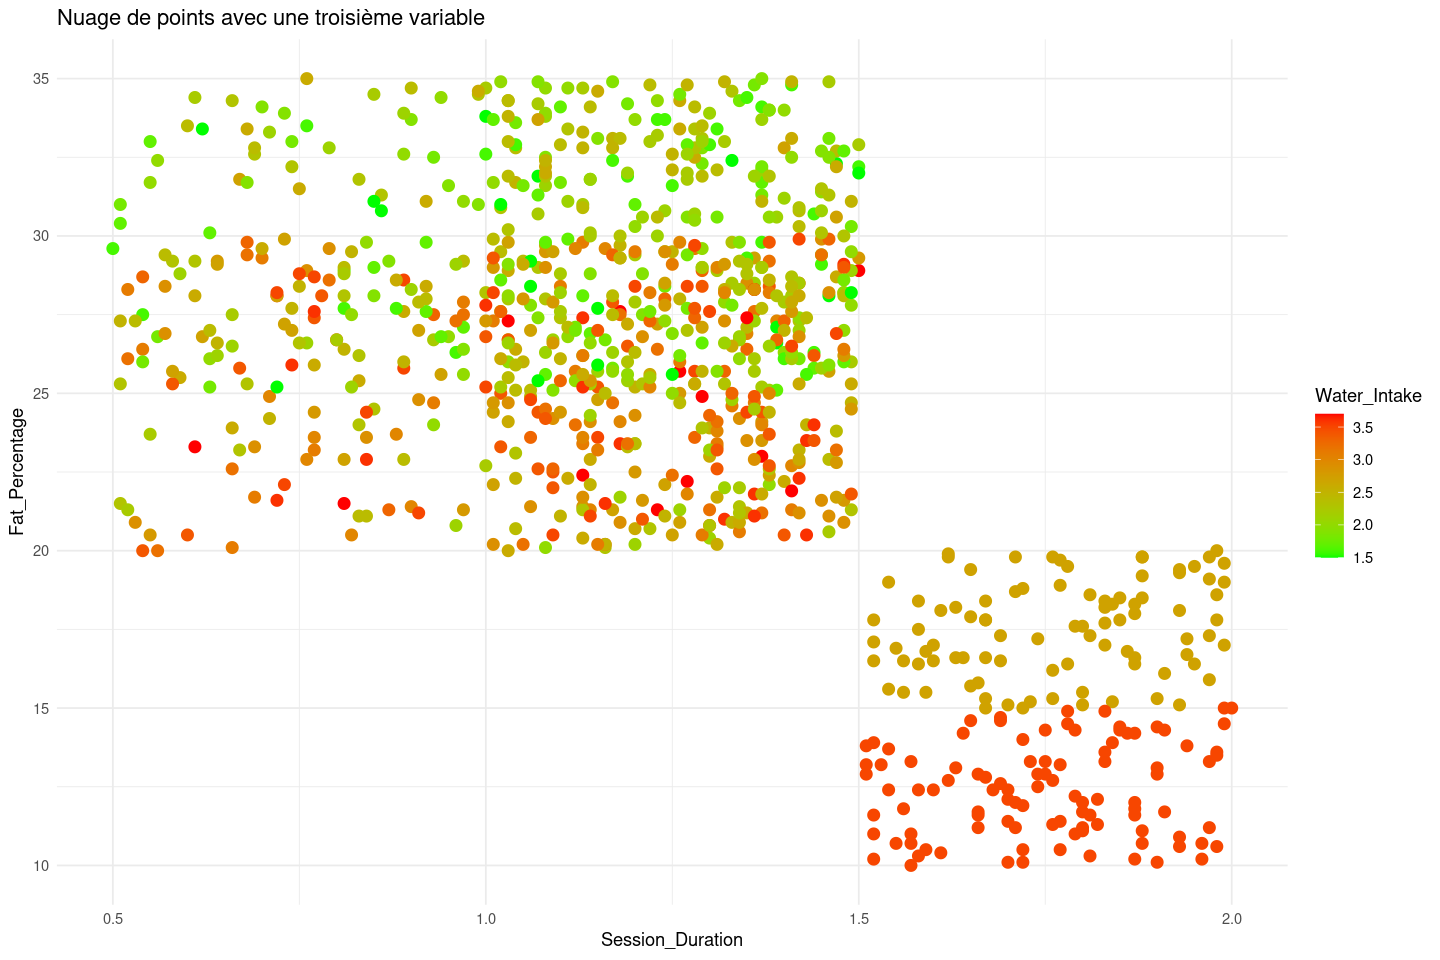

In [12]:
ggplot(Gym, aes(x=Session_Duration, y=Fat_Percentage, color=Water_Intake)) +
  geom_point(size=3) +  # Points colorés selon z
  scale_color_gradient(low="green", high="red") +  # Gradient de couleur
  labs(title="Nuage de points avec une troisième variable",
       x="Session_Duration", y="Fat_Percentage", color="Water_Intake") +
  theme_minimal()

Nous trouvons la présence d'un seuil assez étonnante mais cela peut-être lié à la manière dont les mesures ont été calculées. On a affiché les trois ensemble car elle présentent des corrélation négatives. Au vu de la répartion en seuil c'est encore une fois sûrement du à la manières dont les données ont été collectées.

#### Quali/Quali

Warning message:
“... is ignored in group_split(<grouped_df>), please use group_by(..., .add =
TRUE) %>% group_split()”


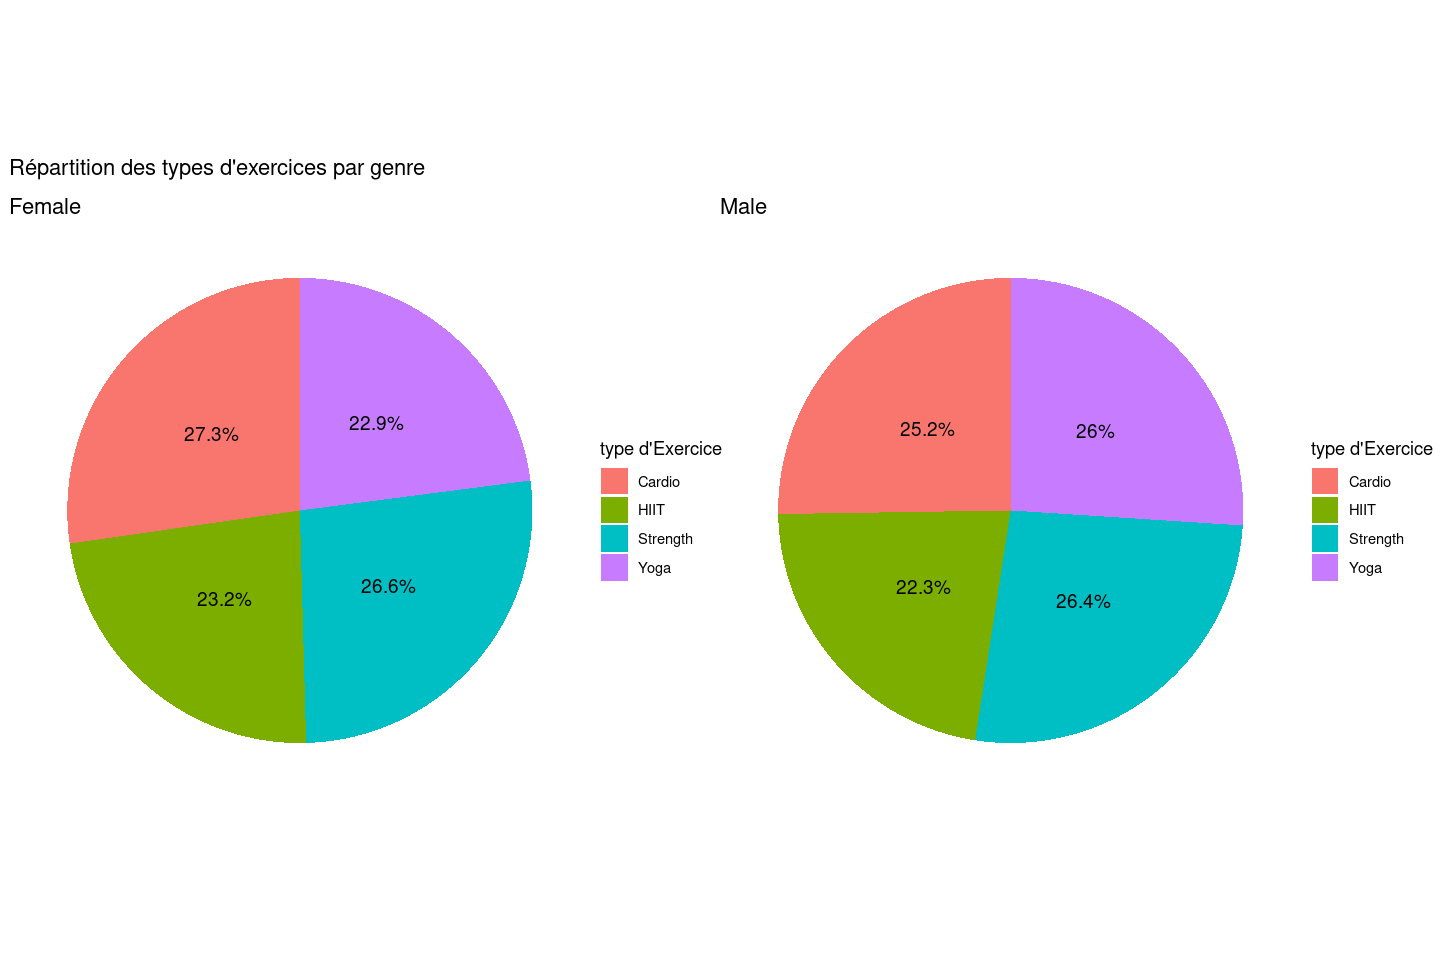

In [13]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")

## Analyse en Composante Principale 

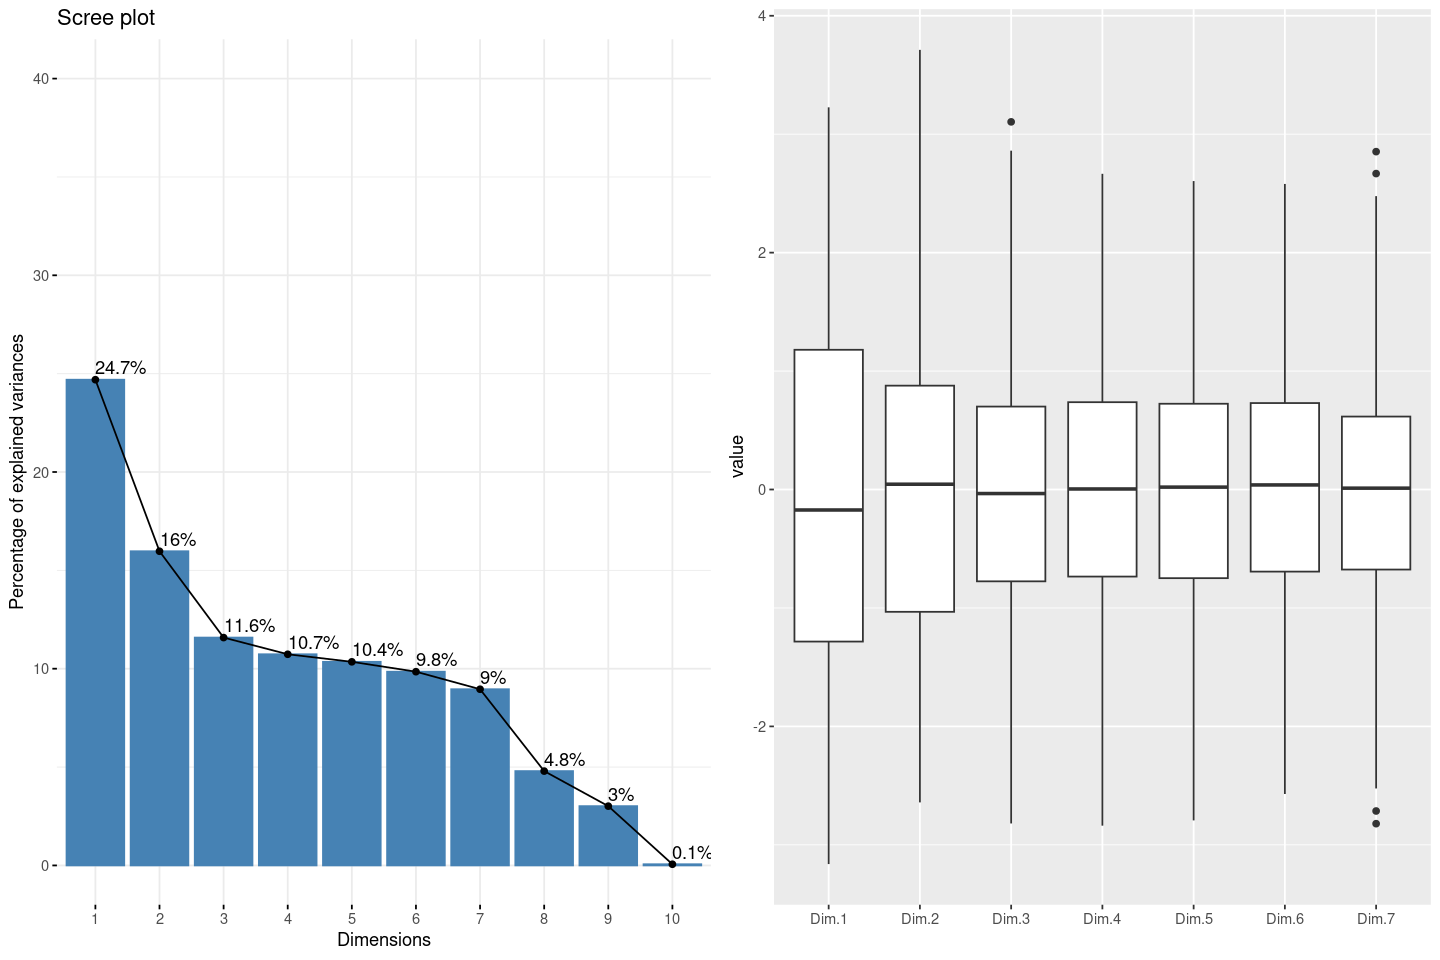

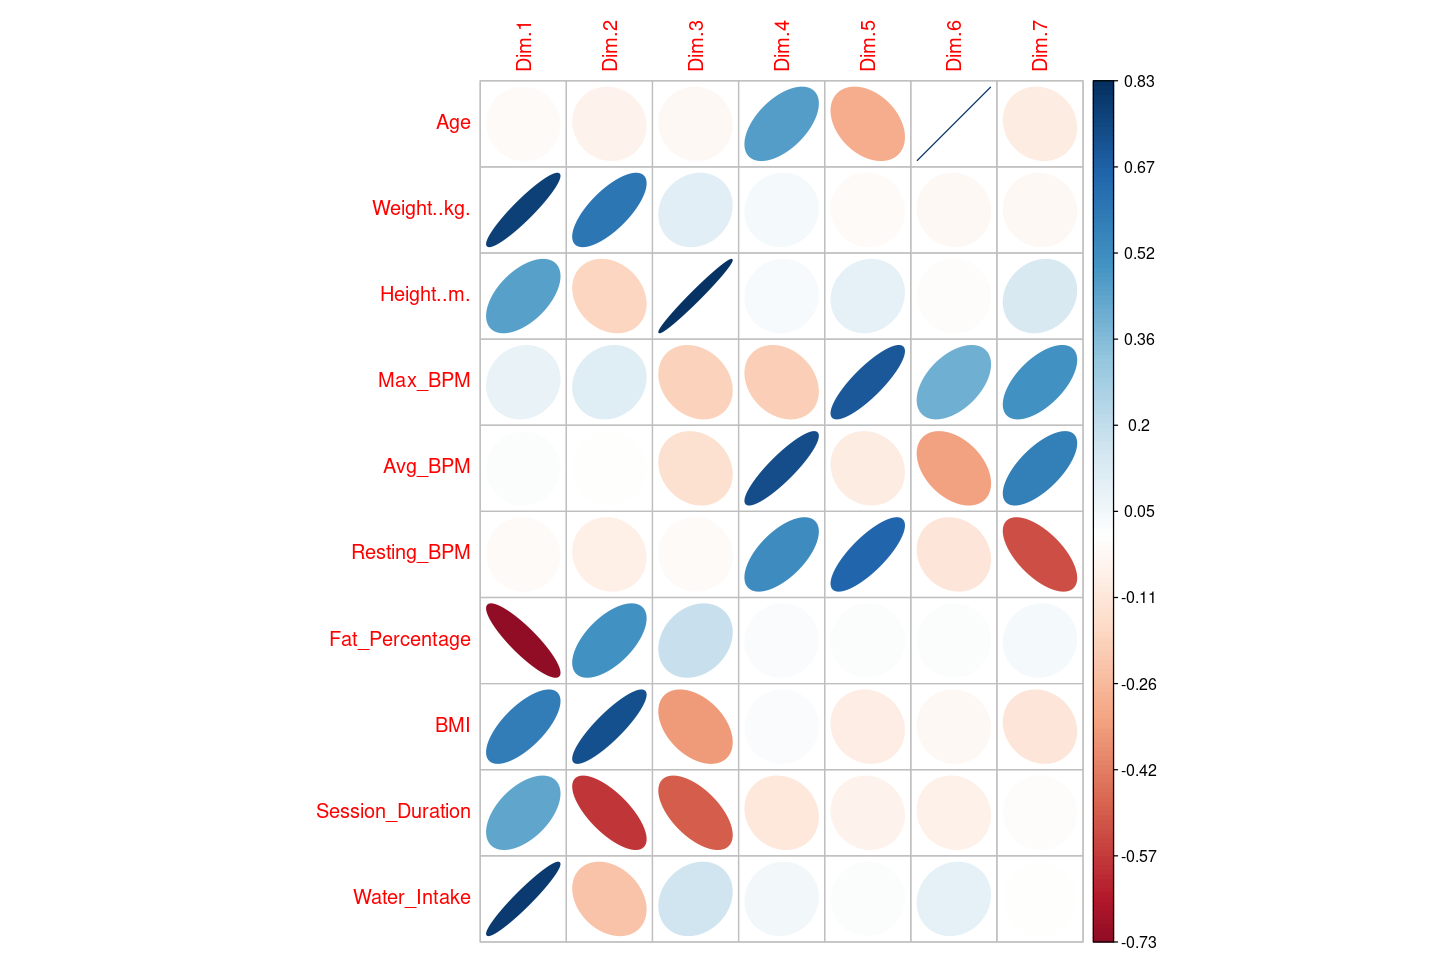

In [14]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 7)

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

In [15]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 6)

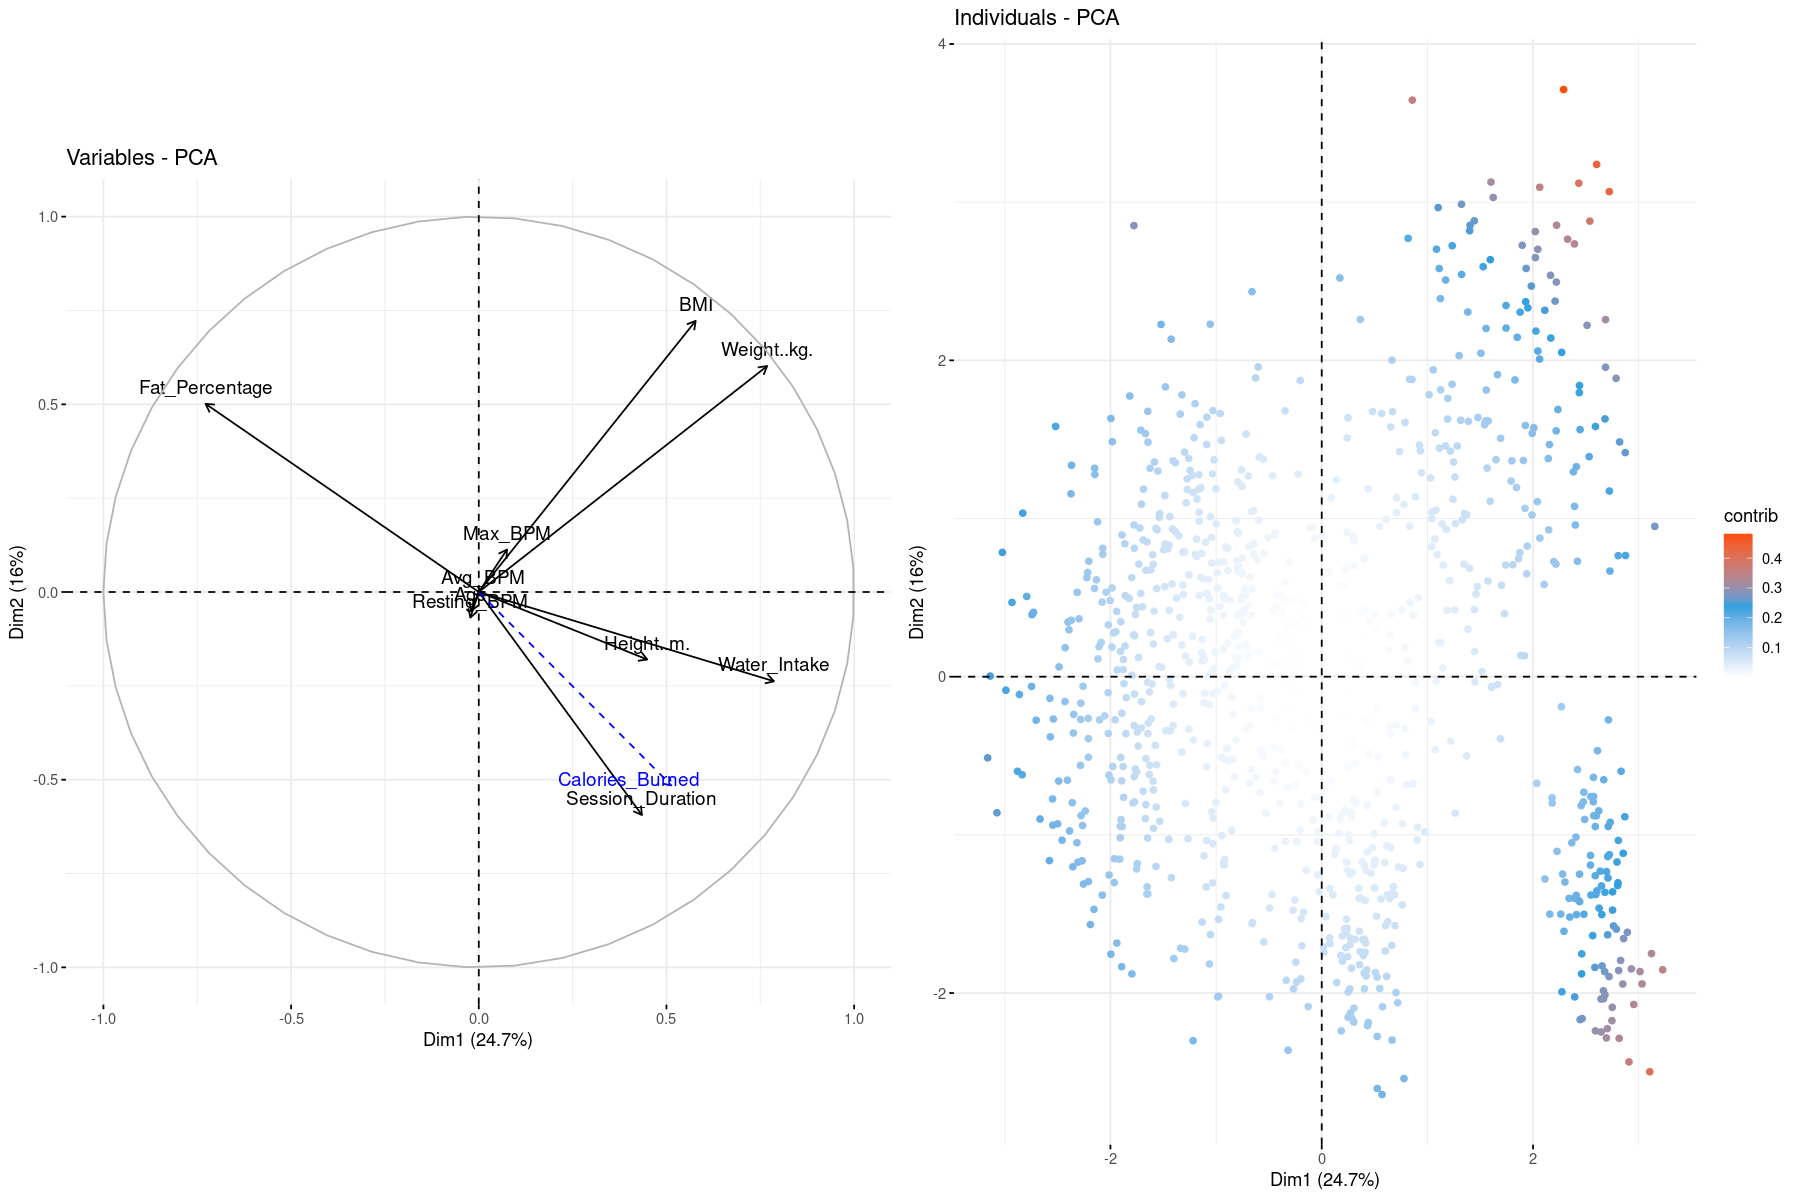

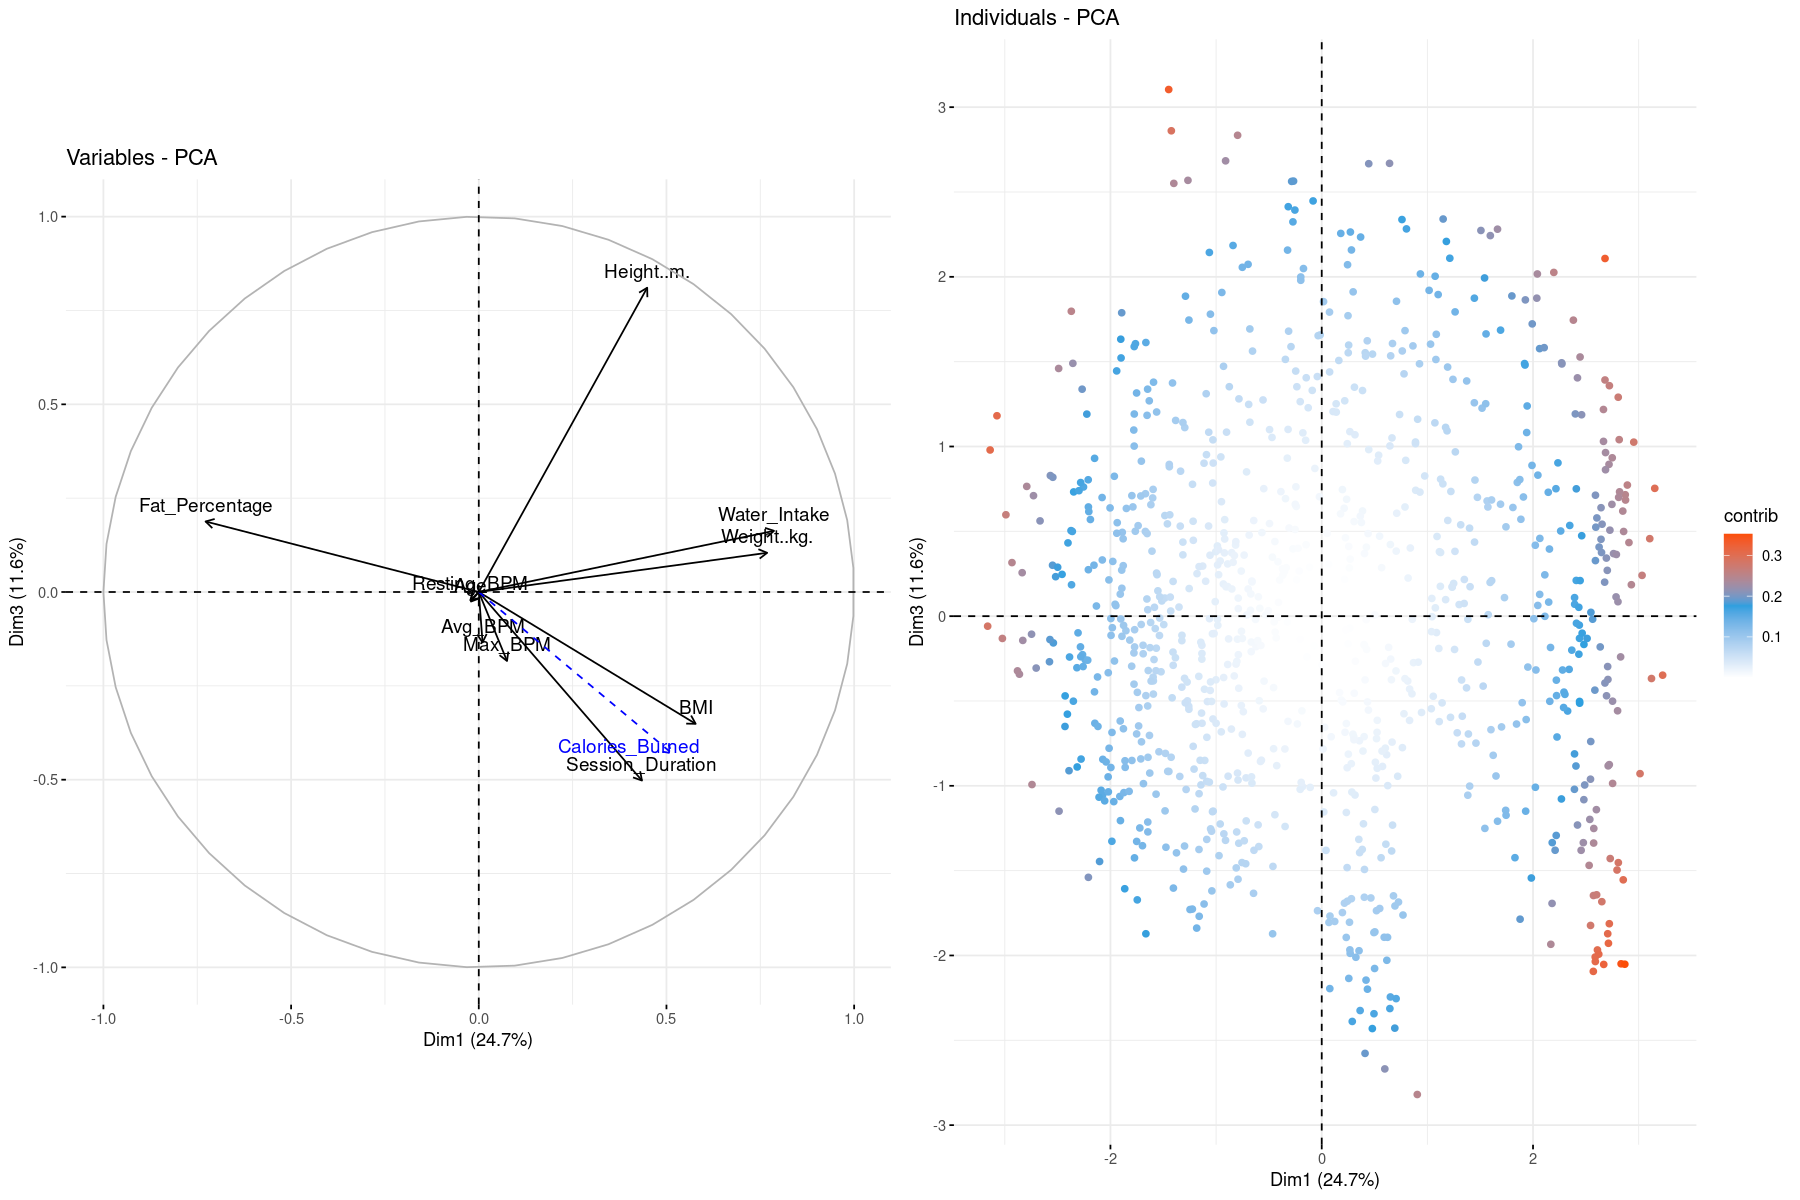

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
p1 <- fviz_pca_var(acp)
p2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
grid.arrange(p1,p2, ncol=2)
p3 <-fviz_pca_var(acp,axes=c(1,3))
p4<- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
grid.arrange(p3,p4,ncol=2)

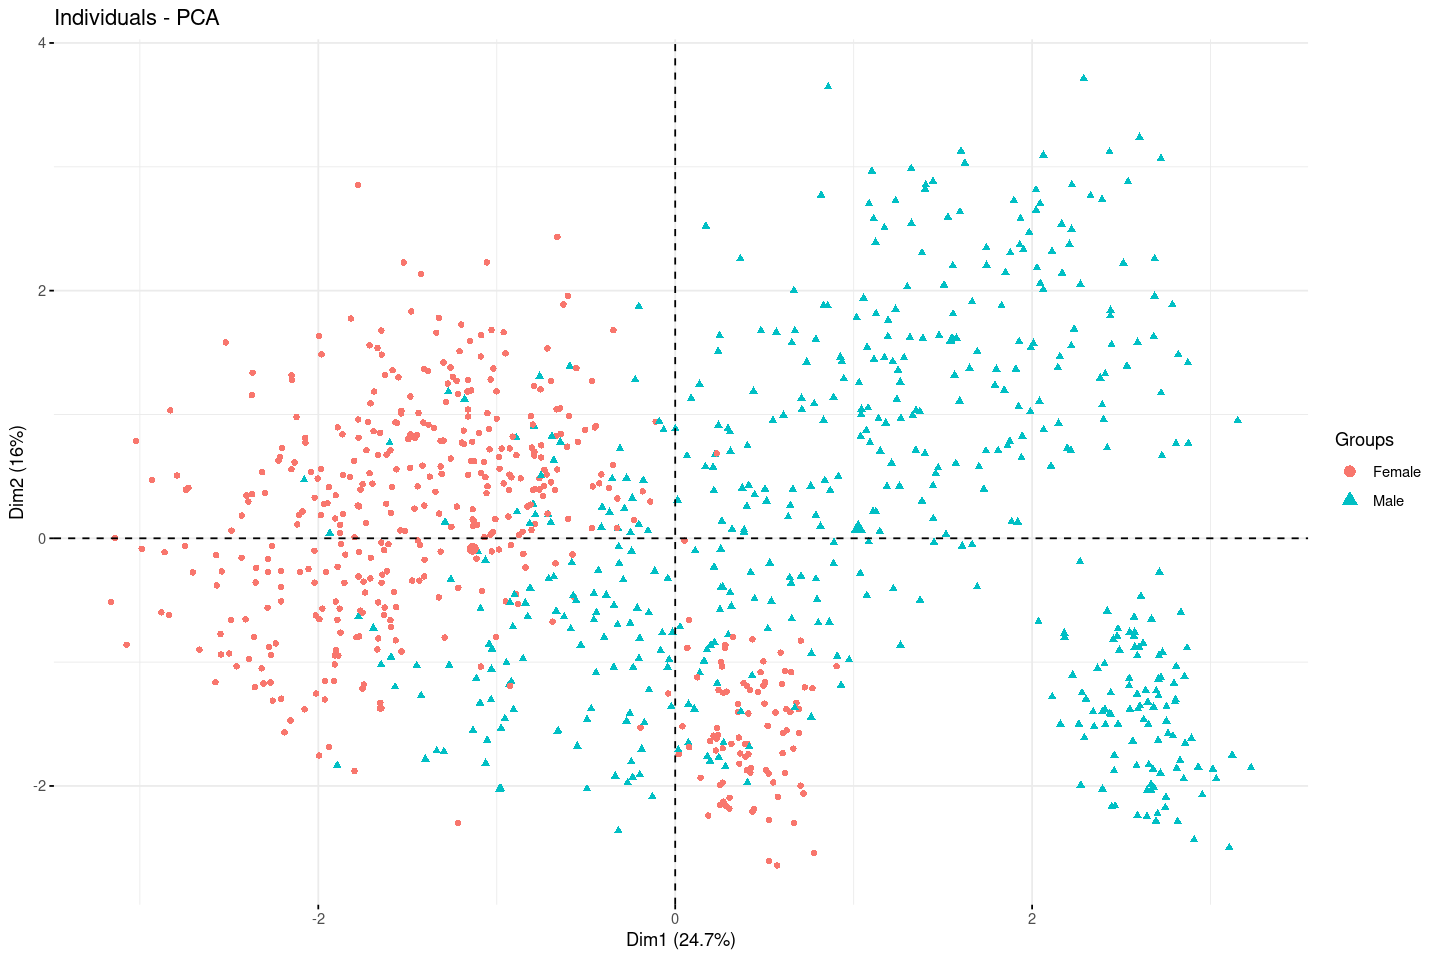

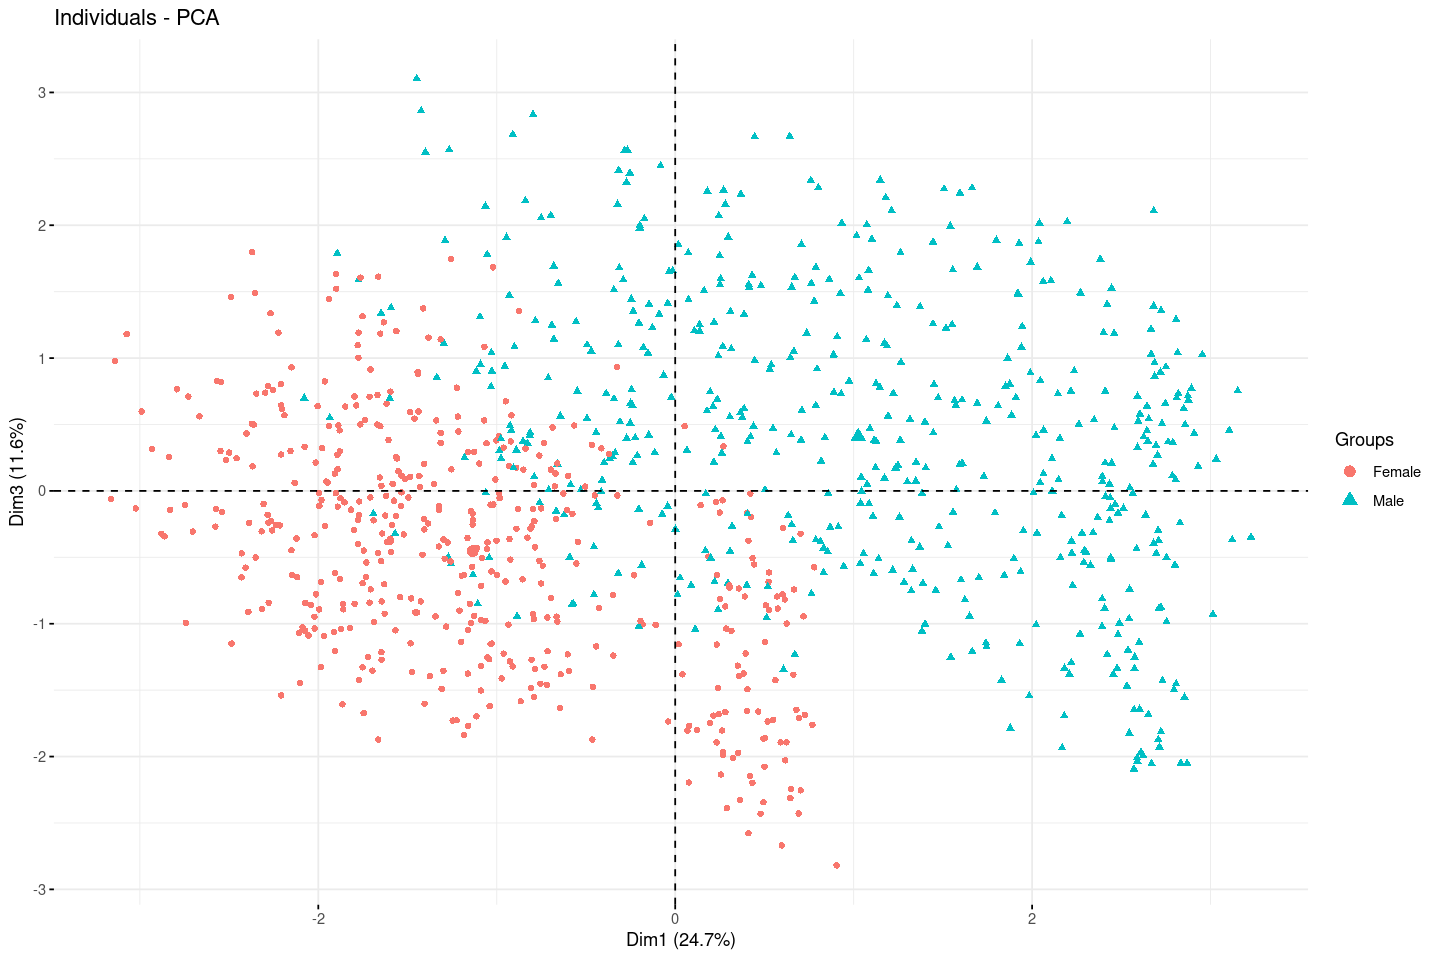

In [17]:
options(repr.plot.width=12, repr.plot.height=8)

fviz_pca_ind(acp, label="none", habillage=Gym$Gender)
fviz_pca_ind(acp, label="none", habillage=Gym$Gender, axes=c(1,3))

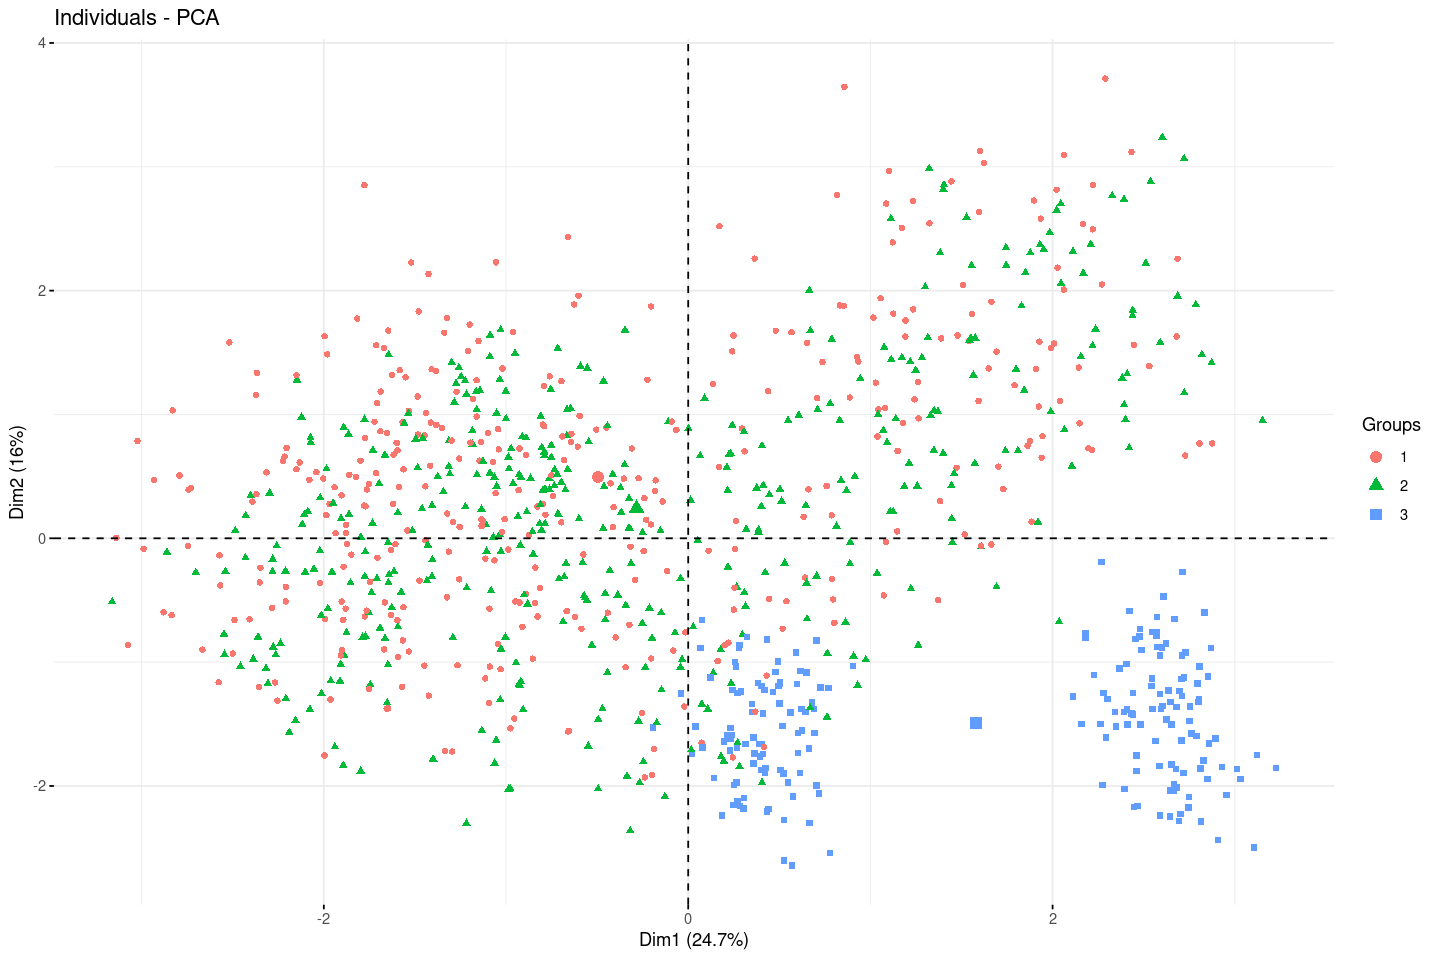

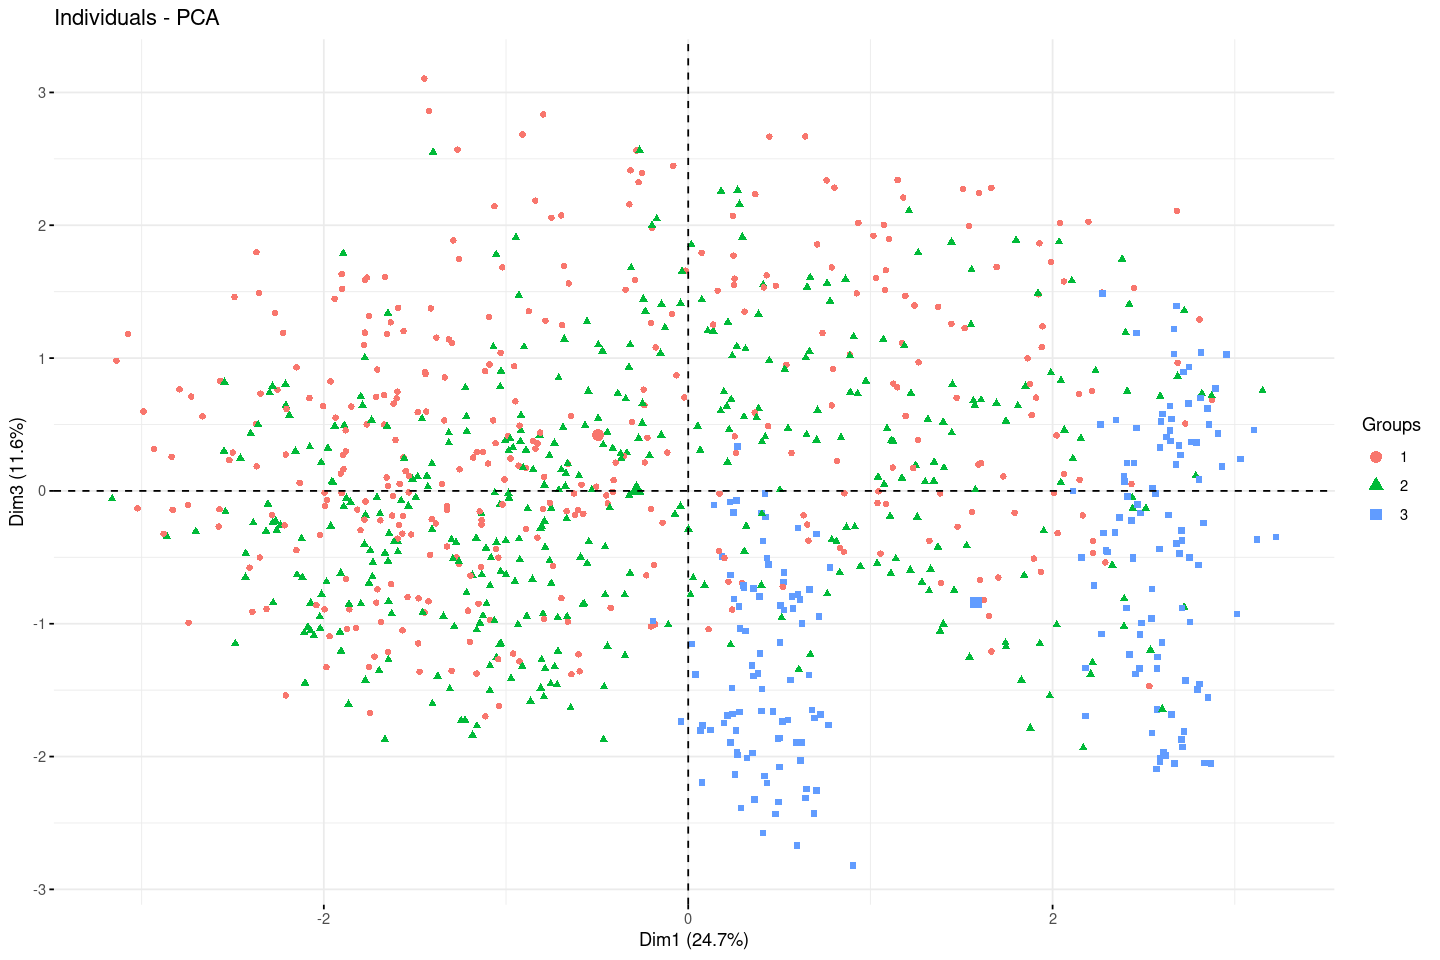

In [18]:
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level)
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level, axes=c(1,3))

In [19]:
set.seed(150) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [20]:
# construction de l'échantillon d'apprentissage
datappr0 <- Gym[appri,] 
# construction de l'échantillon test
datestr0 <- Gym[testi,]
# vérification
str(datappr0)
str(datestr0)
summary(datappr0) 

'data.frame':	778 obs. of  15 variables:
 $ Age              : int  56 46 32 25 38 56 36 40 28 28 ...
 $ Gender           : Factor w/ 2 levels "Female","Male": 2 1 1 2 2 1 2 1 2 2 ...
 $ Weight..kg.      : num  88.3 74.9 68.1 53.2 46.1 ...
 $ Height..m.       : num  1.71 1.53 1.66 1.7 1.79 1.68 1.72 1.51 1.94 1.84 ...
 $ Max_BPM          : int  180 179 167 190 188 168 174 189 185 169 ...
 $ Avg_BPM          : int  157 151 122 164 158 156 169 141 127 136 ...
 $ Resting_BPM      : int  60 66 54 56 68 74 73 64 52 64 ...
 $ Calories_Burned  : num  1313 883 677 532 556 ...
 $ Workout_Type     : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 3 2 1 1 3 1 ...
 $ Fat_Percentage   : num  12.6 33.9 33.4 28.8 29.2 15.5 21.3 30.6 28.9 29.7 ...
 $ Experience_Level : Factor w/ 3 levels "1","2","3": 3 2 2 1 1 3 2 2 2 1 ...
 $ BMI              : num  5.5 5.66 4.97 4.29 3.79 ...
 $ Workout_Frequency: Factor w/ 4 levels "2","3","4","5": 3 3 3 2 2 4 2 2 3 2 ...
 $ Session_Duration : num  1.69 1.3 1.11 0.5

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:374   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :404   1st Qu.: 58.02   1st Qu.:1.620   1st Qu.:170.0  
 Median :39.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.57                Mean   : 73.66   Mean   :1.723   Mean   :179.8  
 3rd Qu.:49.00                3rd Qu.: 85.60   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 303.0   Cardio  :201   Min.   :10.00  
 1st Qu.:132   1st Qu.:56.00   1st Qu.: 723.5   HIIT    :175   1st Qu.:21.20  
 Median :144   Median :62.00   Median : 895.0   Strength:203   Median :26.25  
 Mean   :144   Mean   :62.12   Mean   : 909.4   Yoga    :199   Mean   :24.93  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1089.8       

In [21]:
# on normalise l'échantillon d'apprentissage
datappr=datappr0
datappr[,-c(2,8,9,11,13)]=scale(datappr0[,-c(2,8,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,11,13)]=scale(datestr0[,-c(2,8,9,11,13)],
                            center=sapply(datappr0[,-c(2,8,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,11,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.6719302   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-0.8360099   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-0.0000895   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.0000000   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 0.8358308   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.7414112   Max.   : 1.619

      Age              Gender     Weight..kg.         Height..m.       
 Min.   :-1.69638   Female: 88   Min.   :-1.53774   Min.   :-1.761001  
 1st Qu.:-0.87152   Male  :107   1st Qu.:-0.72548   1st Qu.:-0.812644  
 Median : 0.11832                Median :-0.14462   Median :-0.180407  
 Mean   : 0.04853                Mean   : 0.04532   Mean   :-0.009784  
 3rd Qu.: 1.02567                3rd Qu.: 0.62750   3rd Qu.: 0.570375  
 Max.   : 1.68557                Max.   : 2.58496   Max.   : 2.190483  
    Max_BPM            Avg_BPM          Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.67193   Min.   :-1.65238   Min.   : 319.0  
 1st Qu.:-0.84614   1st Qu.:-0.90567   1st Qu.:-0.83442   1st Qu.: 711.0  
 Median : 0.10653   Median :-0.34839   Median : 0.25618   Median : 882.0  
 Mean   : 0.04924   Mean   :-0.08154   Mean   : 0.06952   Mean   : 889.7  
 3rd Qu.: 0.88599   3rd Qu.: 0.83583   3rd Qu.: 0.86965   3rd Qu.:1025.0  
 Max.   : 1.66546   Max.   : 1.74141   Max.   

In [30]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(200,2000)+ylim(-150,200)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

                   Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                 1  1370418  1370418   846.877  < 2e-16 ***
Gender              1  1258021  1258021   777.419  < 2e-16 ***
Weight..kg.         1    19288    19288    11.919 0.000586 ***
Height..m.          1      898      898     0.555 0.456480    
Max_BPM             1    13399    13399     8.280 0.004120 ** 
Avg_BPM             1  6693583  6693583  4136.433  < 2e-16 ***
Resting_BPM         1        5        5     0.003 0.955216    
Workout_Type        3   502697   167566   103.550  < 2e-16 ***
Fat_Percentage      1 19926671 19926671 12314.081  < 2e-16 ***
Experience_Level    2  9695358  4847679  2995.719  < 2e-16 ***
BMI                 1     3602     3602     2.226 0.136125    
Workout_Frequency   3    29856     9952     6.150 0.000392 ***
Session_Duration    1 17829857 17829857 11018.314  < 2e-16 ***
Water_Intake        1       33       33     0.020 0.886265    
Residuals         758  1226597     1618                

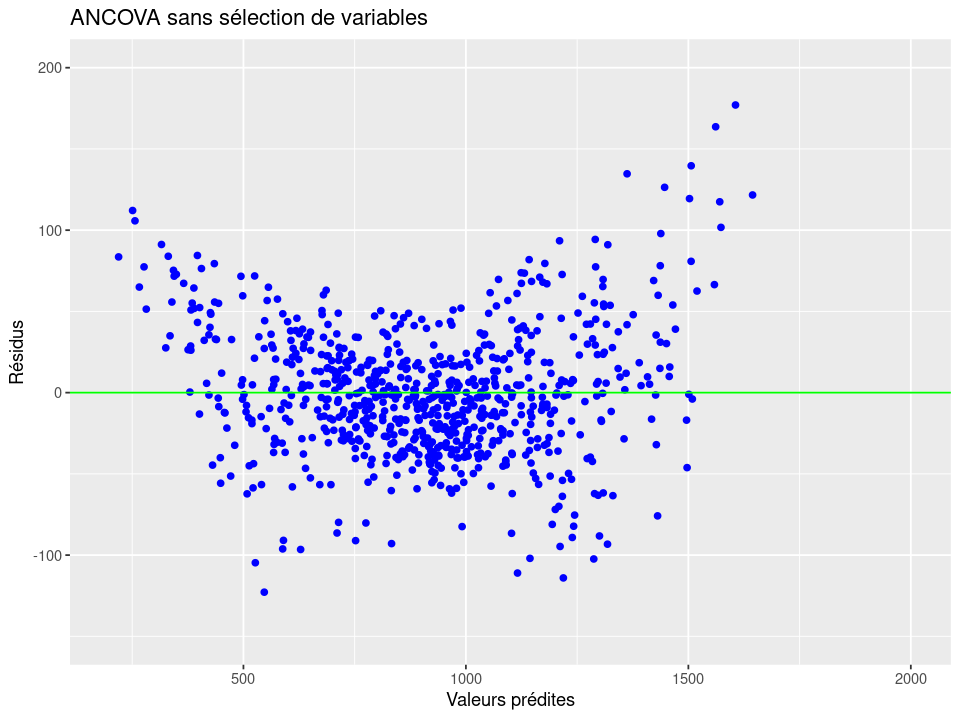

In [31]:
options(repr.plot.width=8, repr.plot.height=6)

# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
summary(reg.lm)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

In [50]:
summary_lm <- summary.lm(reg.lm)  # Convertir l'ANOVA en modèle linéaire

R2 <- 1 - sum(summary_lm$residuals^2) / sum((datappr$Calories_Burned - mean(datappr$Calories_Burned))^2)

cat("R² :", R2, "\n")

MSE <- mean(summary_lm$residuals^2)
cat("MSE :", MSE, "\n")

R² : 0.9790577 
MSE : 1576.603 


In [29]:
coef(reg.lm)

(Intercept)                  Age           GenderMale 
         873.5589375          -41.8102697           78.9071361 
         Weight..kg.           Height..m.              Max_BPM 
         -19.8983311           13.9975148           -0.6322221 
             Avg_BPM          Resting_BPM     Workout_TypeHIIT 
          89.5814791            3.2221675           -2.6555976 
Workout_TypeStrength     Workout_TypeYoga       Fat_Percentage 
          -3.7457647           -7.6911177           -4.3651552 
   Experience_Level2    Experience_Level3                  BMI 
          -2.9511369          -19.5917478           21.9079495 
  Workout_Frequency3   Workout_Frequency4   Workout_Frequency5 
           2.3508953            4.5498763           11.6374513 
    Session_Duration         Water_Intake 
         249.7302448           -0.3387401

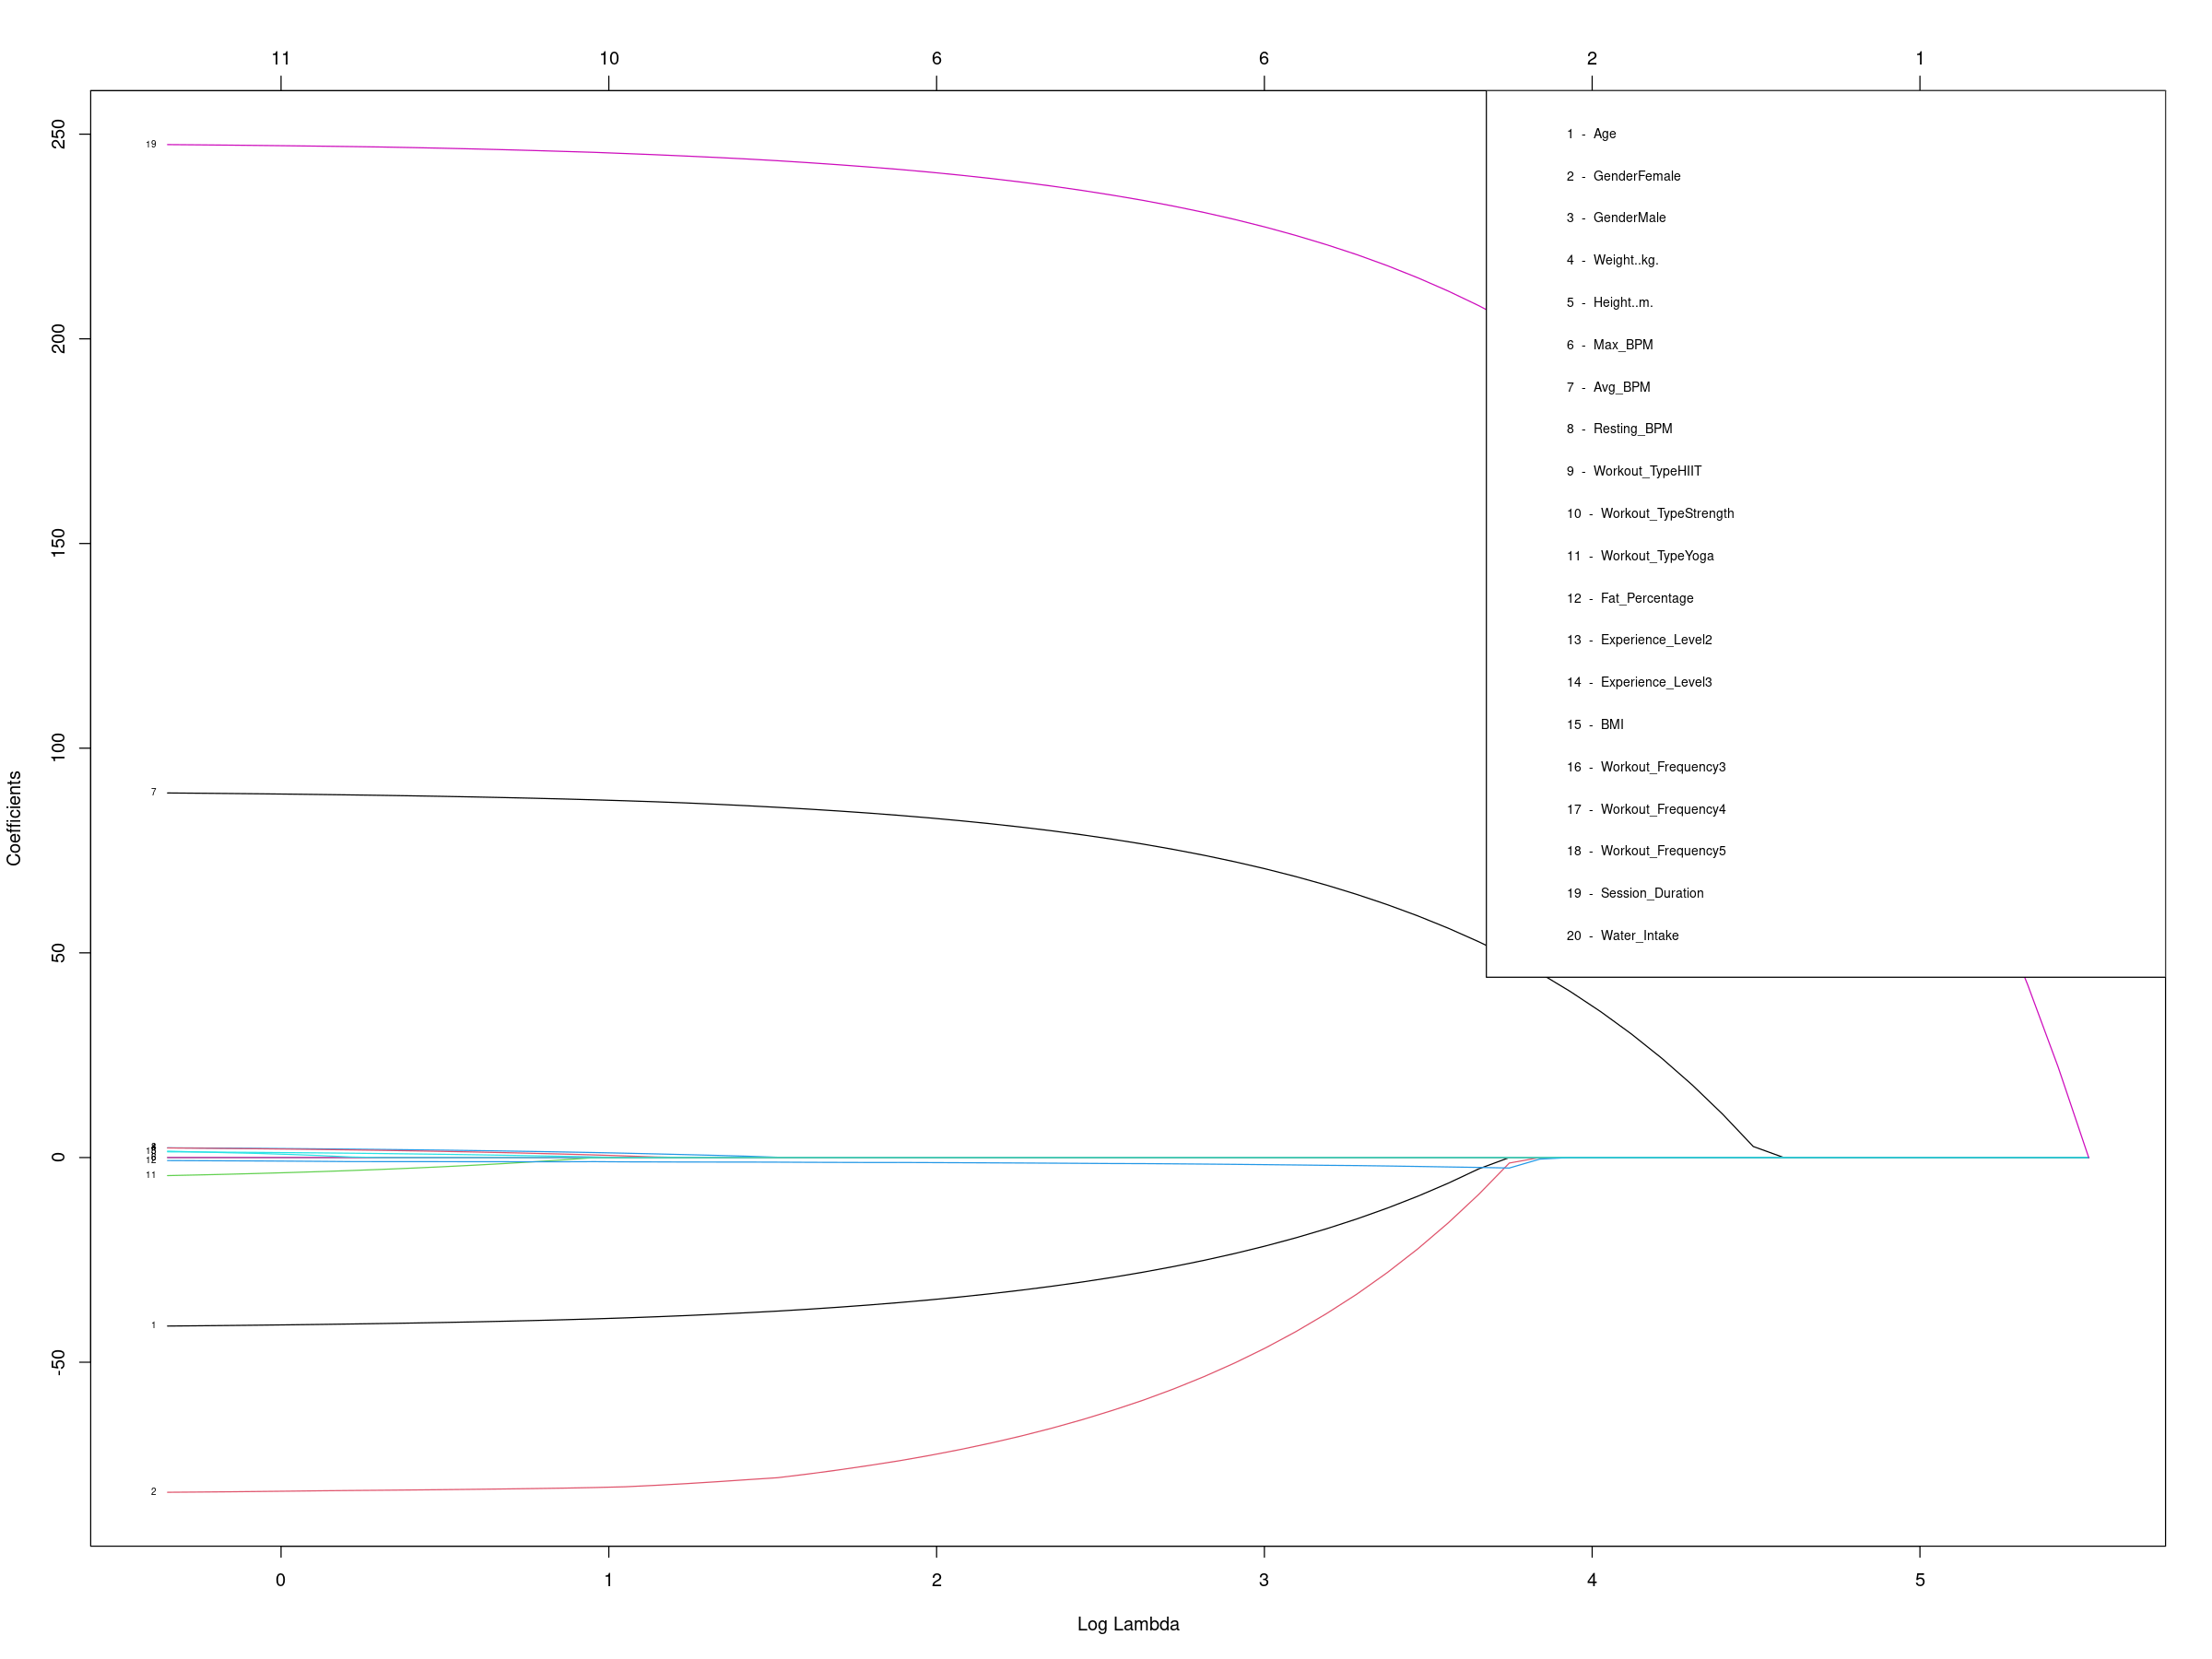

In [37]:
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 8],
                           x = as.matrix(datappr[, -c(2,8,9,11,13)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)), cex = 0.7)

In [39]:
head(x.mat)


,Age,GenderFemale,GenderMale,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Workout_TypeHIIT,Workout_TypeStrength,Workout_TypeYoga,Fat_Percentage,Experience_Level2,Experience_Level3,BMI,Workout_Frequency3,Workout_Frequency4,Workout_Frequency5,Session_Duration,Water_Intake
1,1.43810650,0,1,0.69125547,-0.1013774,0.01992624,0.9054908,-0.2891225,0,0,1,-1.9536730,0,1,0.84264347,0,1,0,1.2406667,1.4563669
2,0.61324152,1,0,0.05844784,-1.5239116,-0.06668055,0.4875307,0.5288313,1,0,0,1.4213345,1,0,1.08813158,0,1,0,0.1143672,-0.8805141
3,-0.54156945,1,0,-0.26267841,-0.4965258,-1.10596212,-1.5326102,-1.1070762,0,0,0,1.3421090,1,0,0.04483431,0,1,0,-0.4343429,-0.5466739
4,-1.11897493,0,1,-0.96632272,-0.1804071,0.88599421,1.3931110,-0.8344249,0,1,0,0.6132341,0,0,-0.98977662,1,0,0,-1.9360756,-0.8805141
5,-0.04665046,0,1,-1.30161631,0.5308600,0.71278062,0.9751509,0.8014825,0,1,0,0.6766145,0,0,-1.74611631,1,0,0,-1.7916782,0.2879264
6,1.43810650,1,0,-0.73964536,-0.3384664,-1.01935532,0.8358308,1.6194362,1,0,0,-1.4941650,0,1,-0.62090440,0,0,1,0.9518720,0.1210063


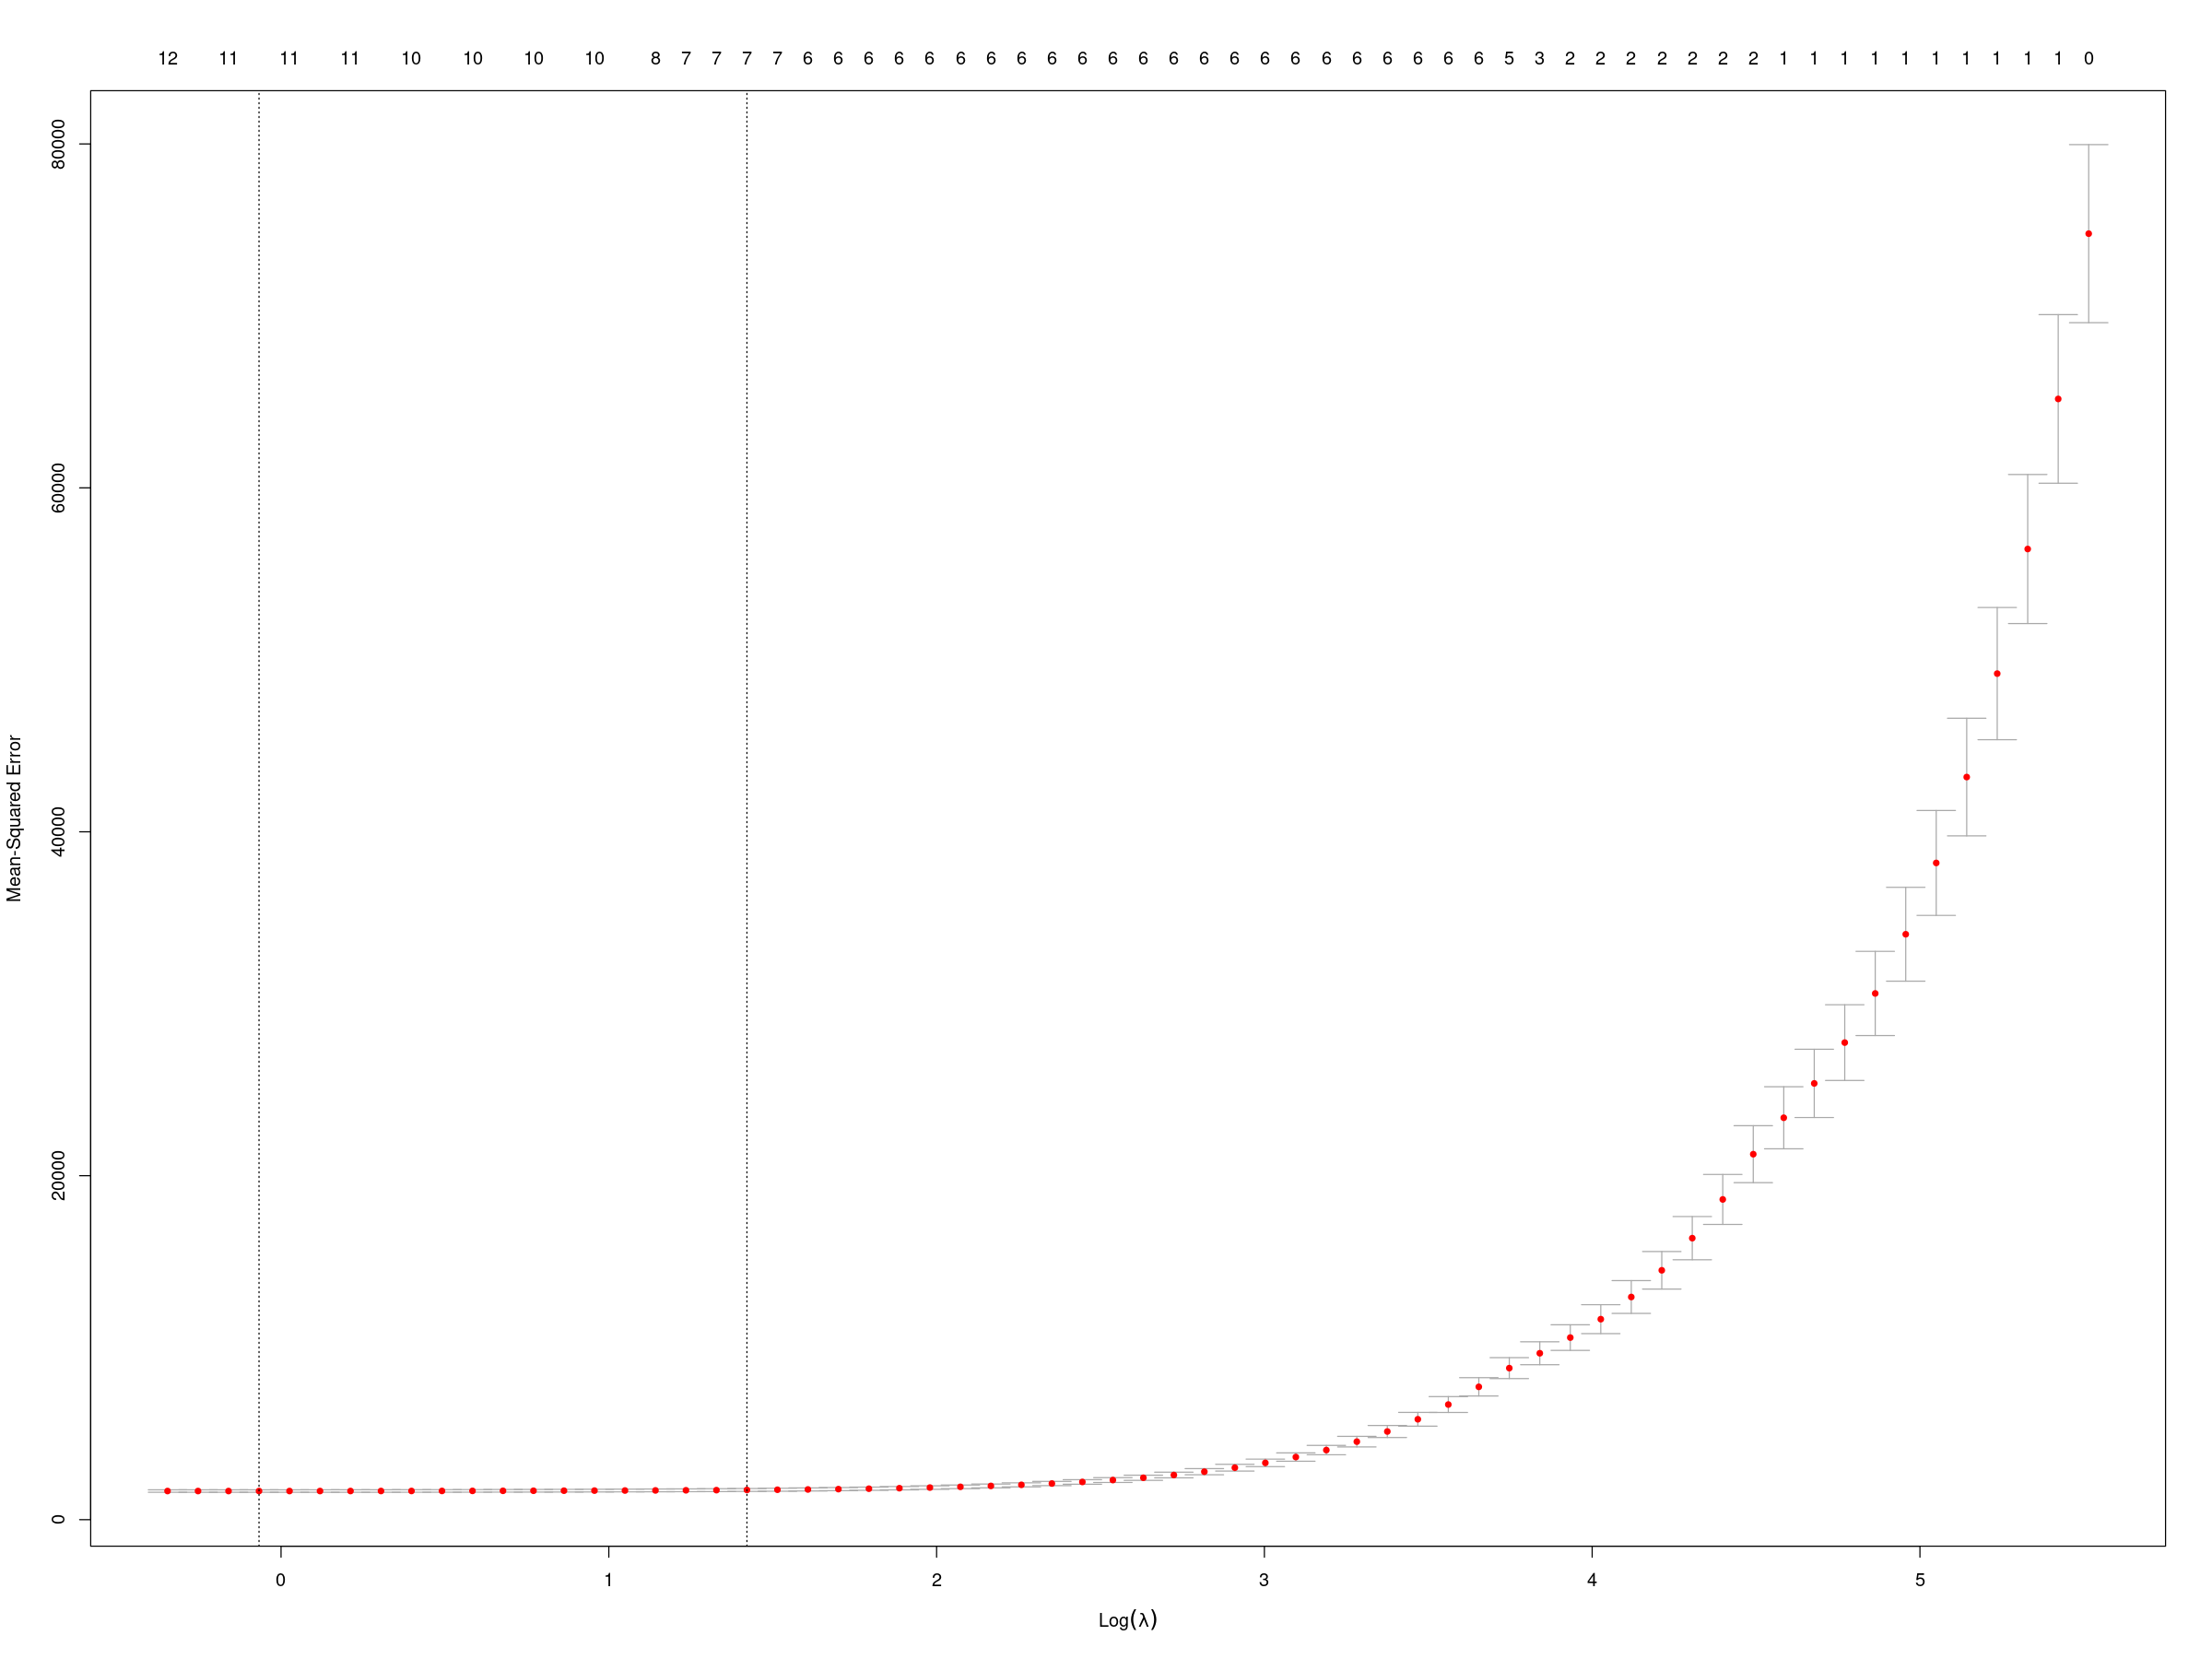

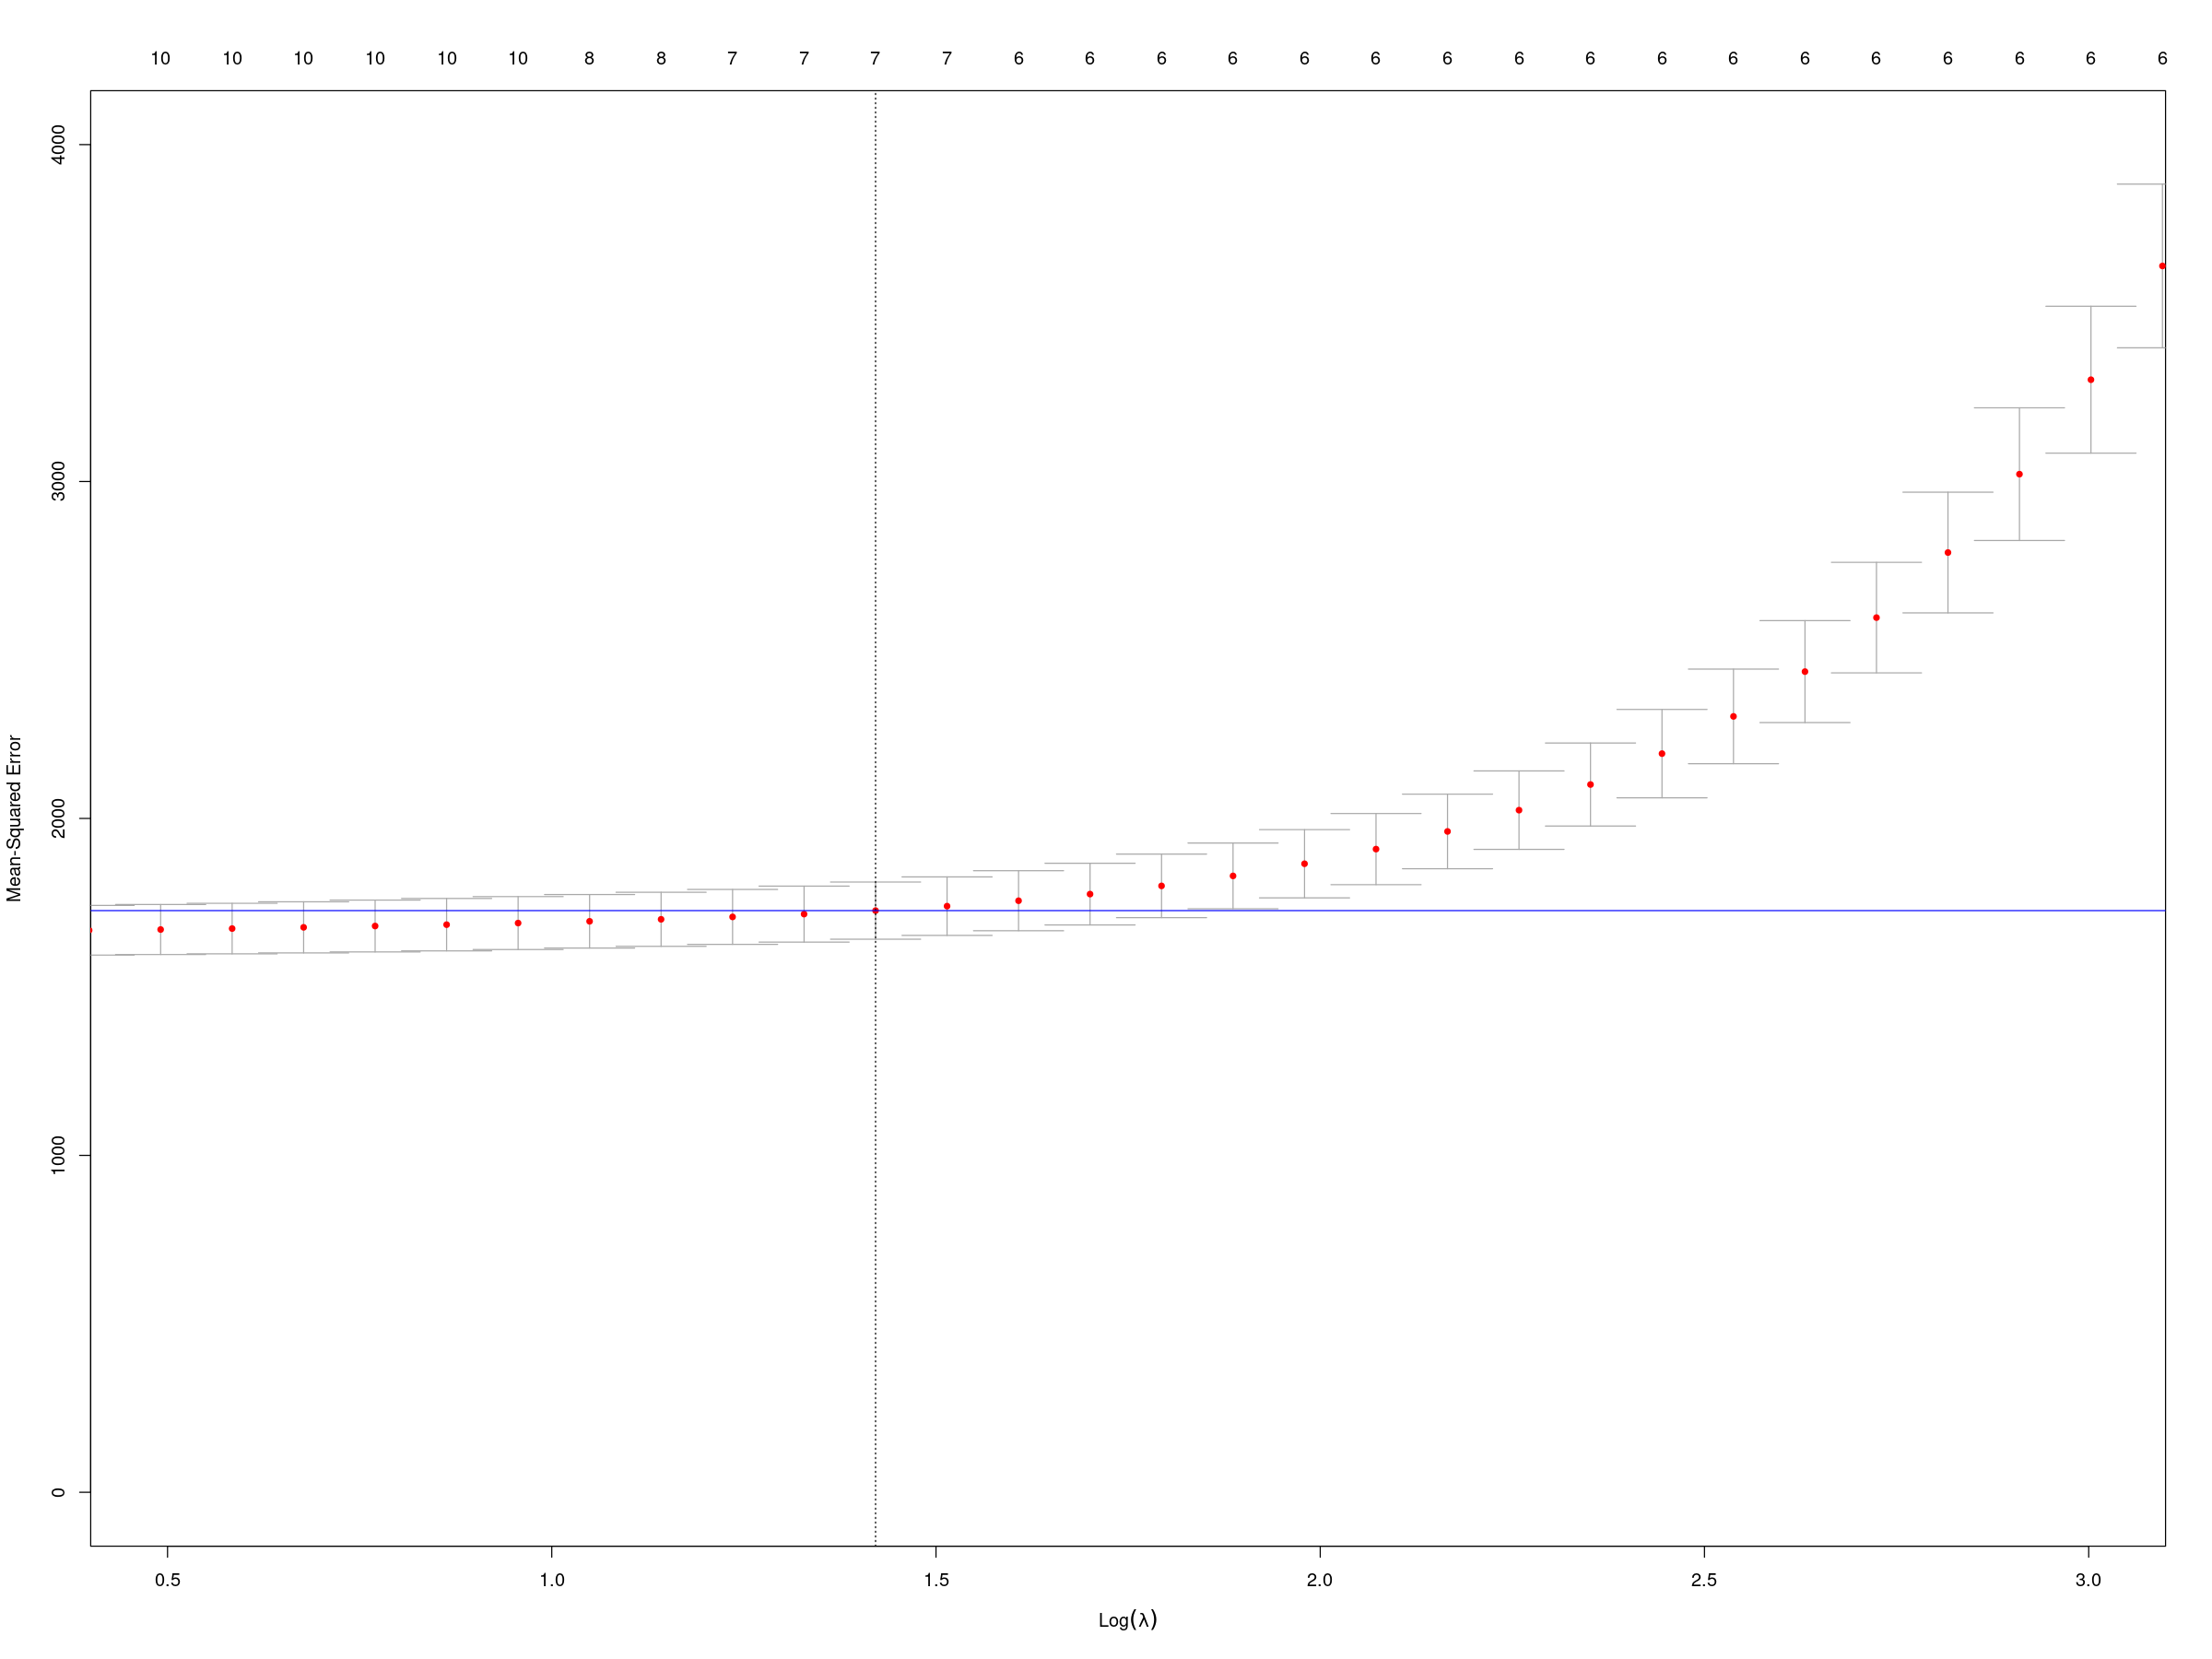

In [49]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)
plot(reg.lasso.cv,xlim=c(0.5,3),ylim=c(0,4000))
abline(h=reg.lasso.cv$cvm[c(reg.lasso.cv$index)[2]],col="blue")